In [1]:
import math

from plotting import PlotType, Plotter
from traj import Vec2
from traj2D import BangBangTrajectory2D

In [2]:
max_acc = 3.0
max_vel = 2.0
global_save_figures = False

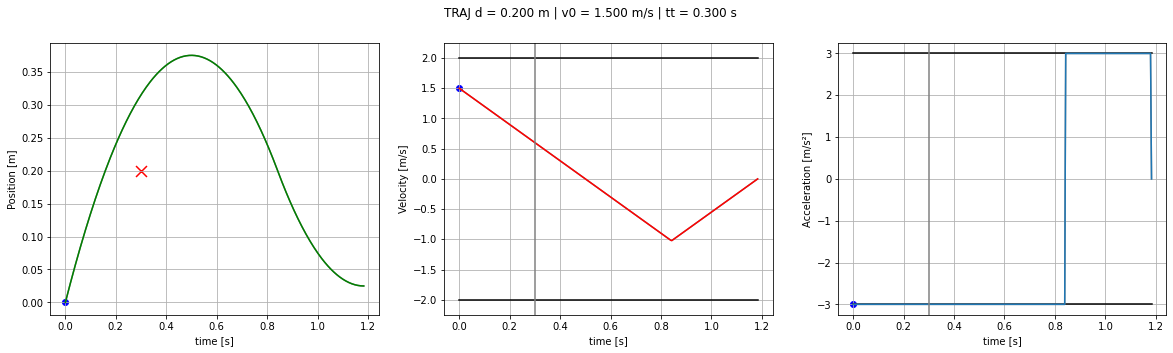

In [3]:
Plotter.plot(0.2, 1.5, 0.3, max_vel, max_acc, PlotType.TRAJ)

/home/michael/TUM-Master/pythonProject/plotting.py:336: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(20, 15))


AttributeError: 'NoneType' object has no attribute 'get_position'

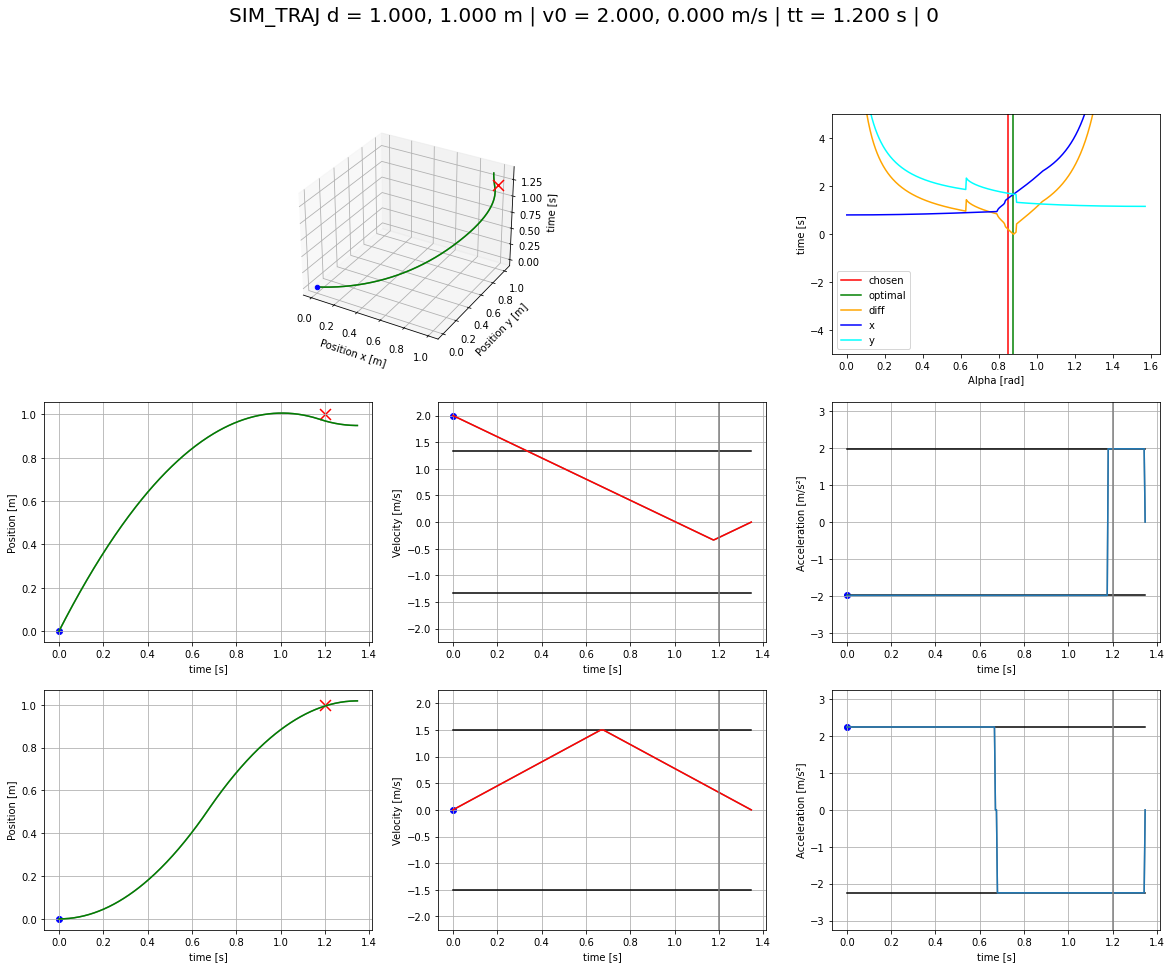

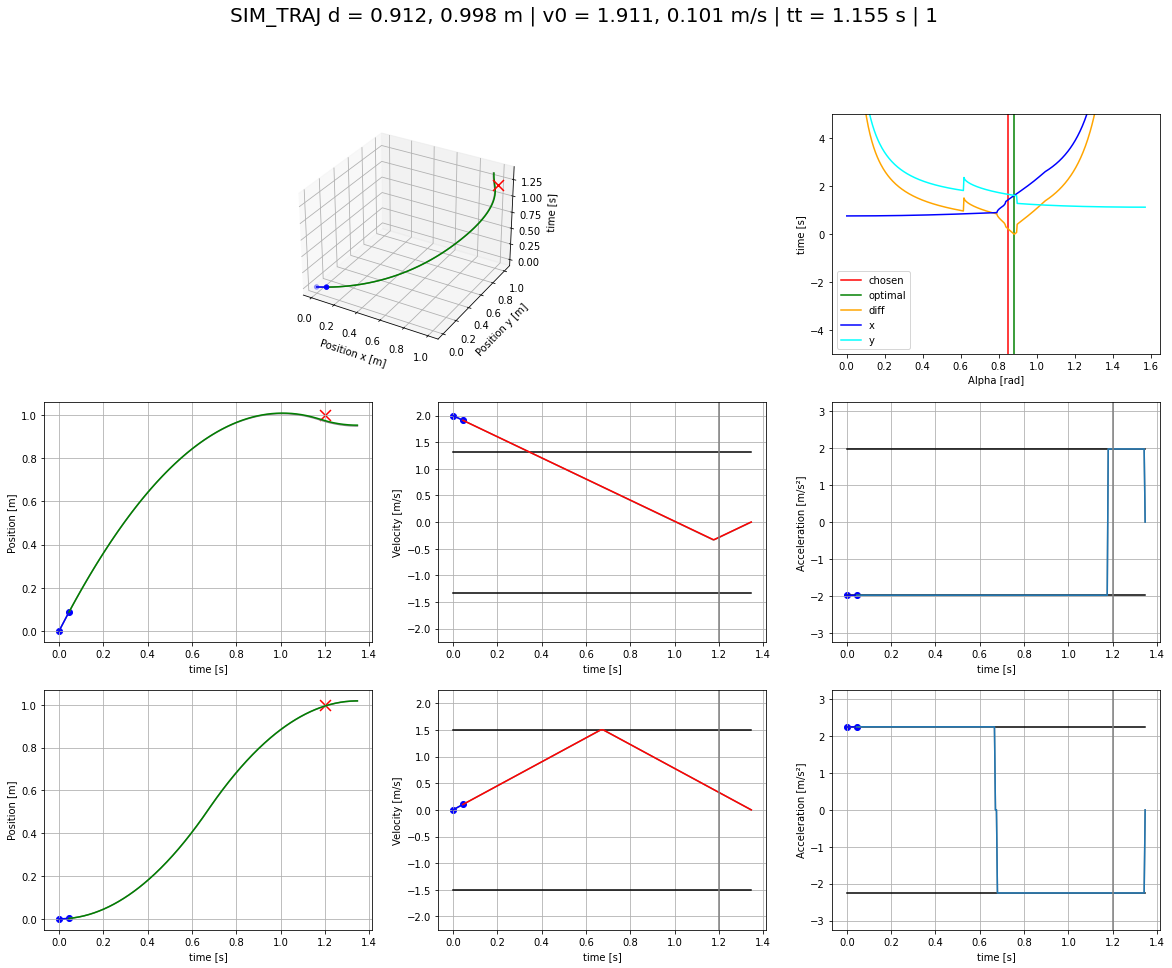

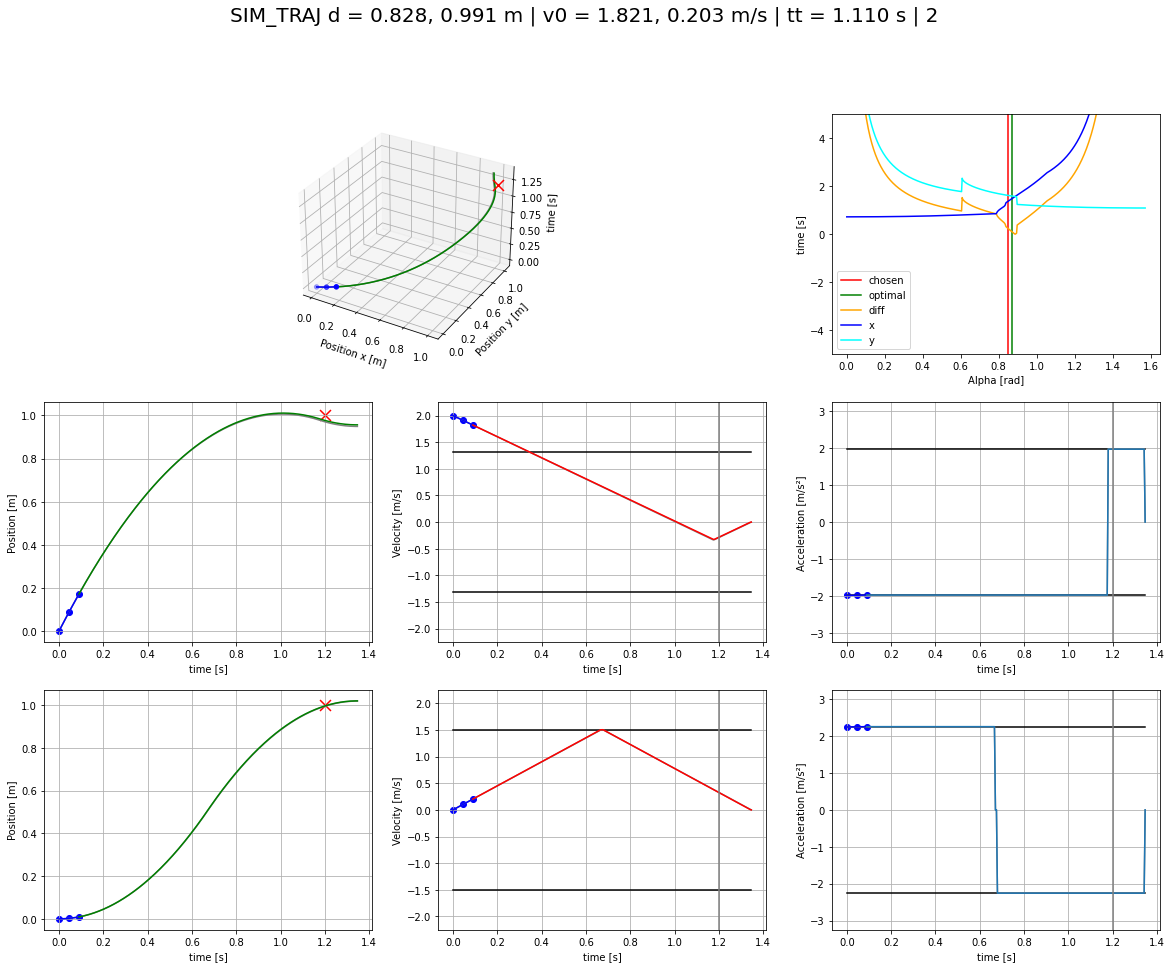

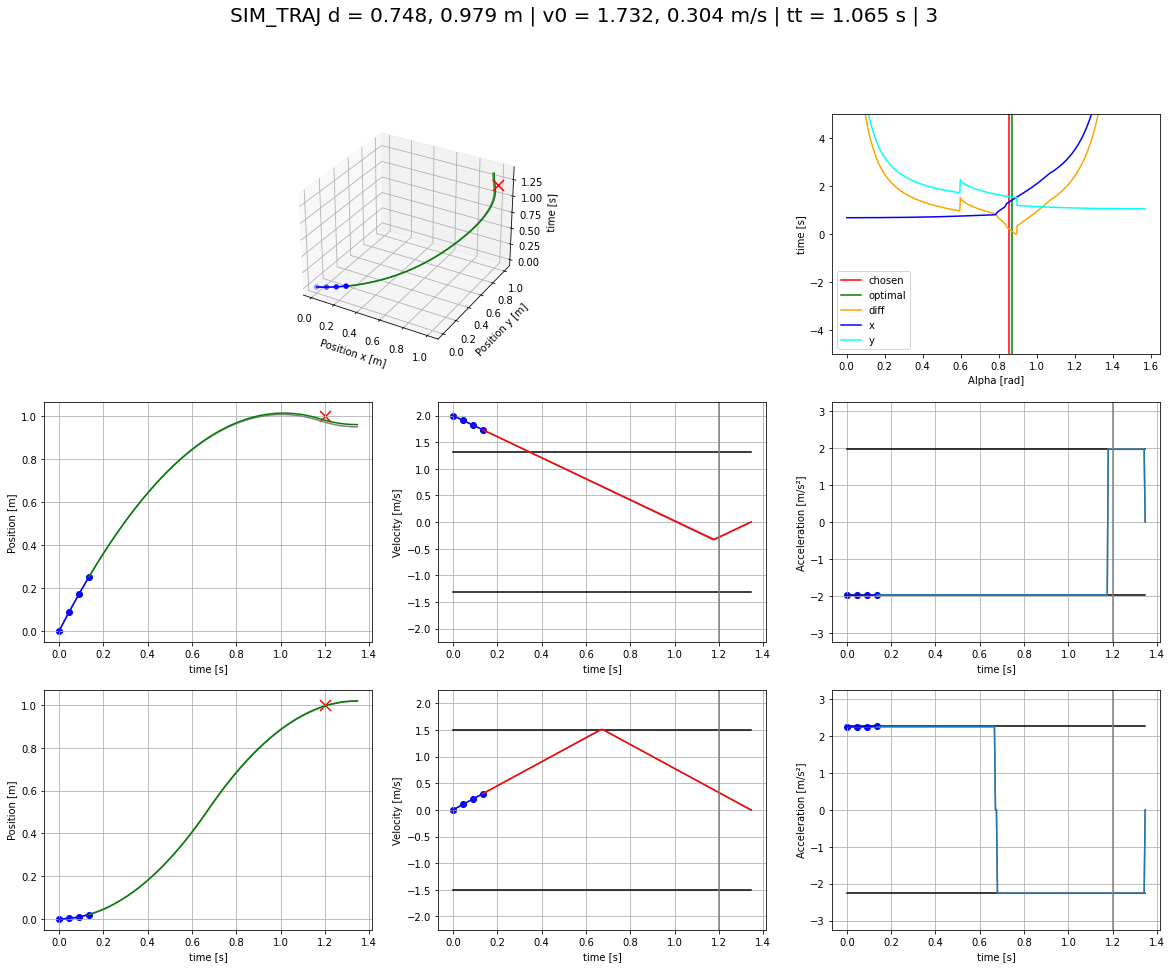

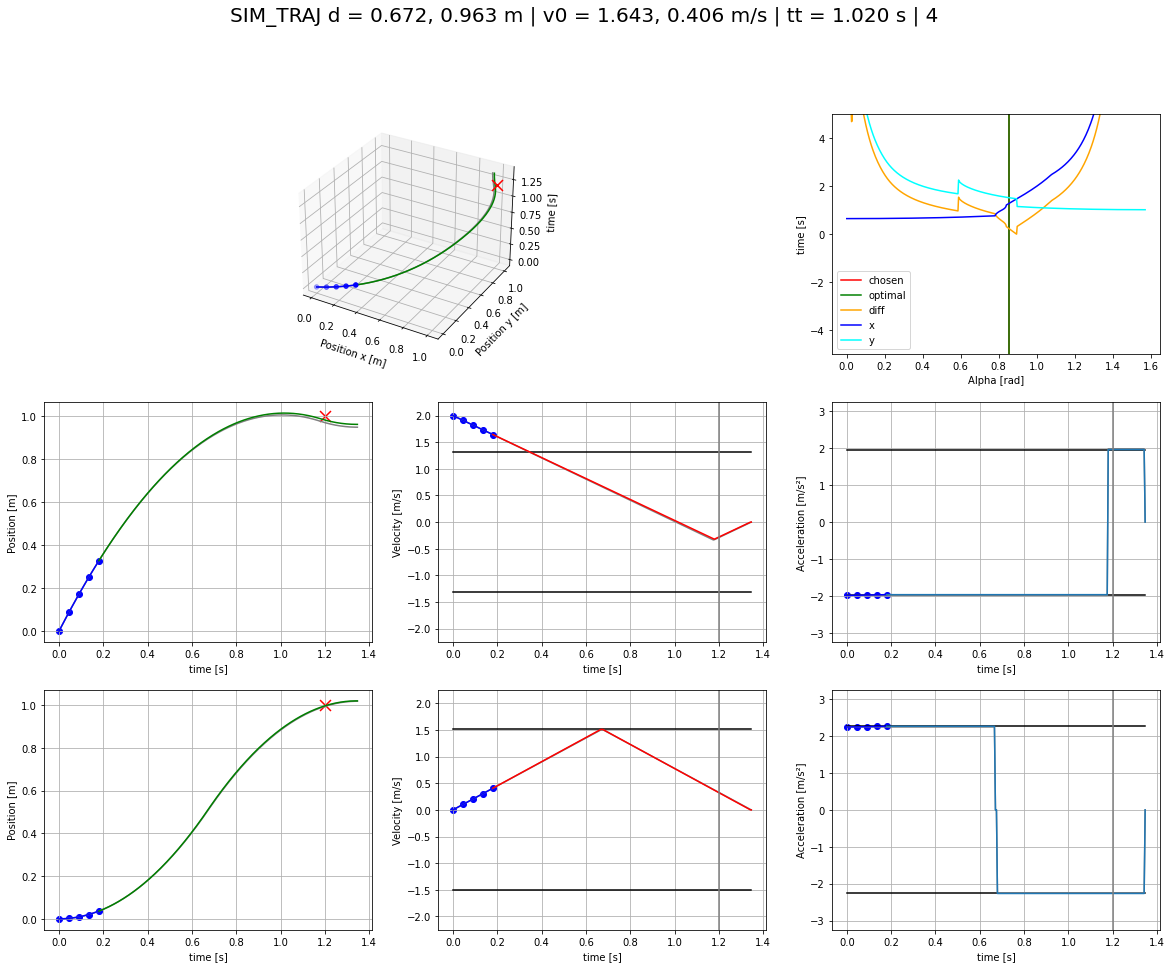

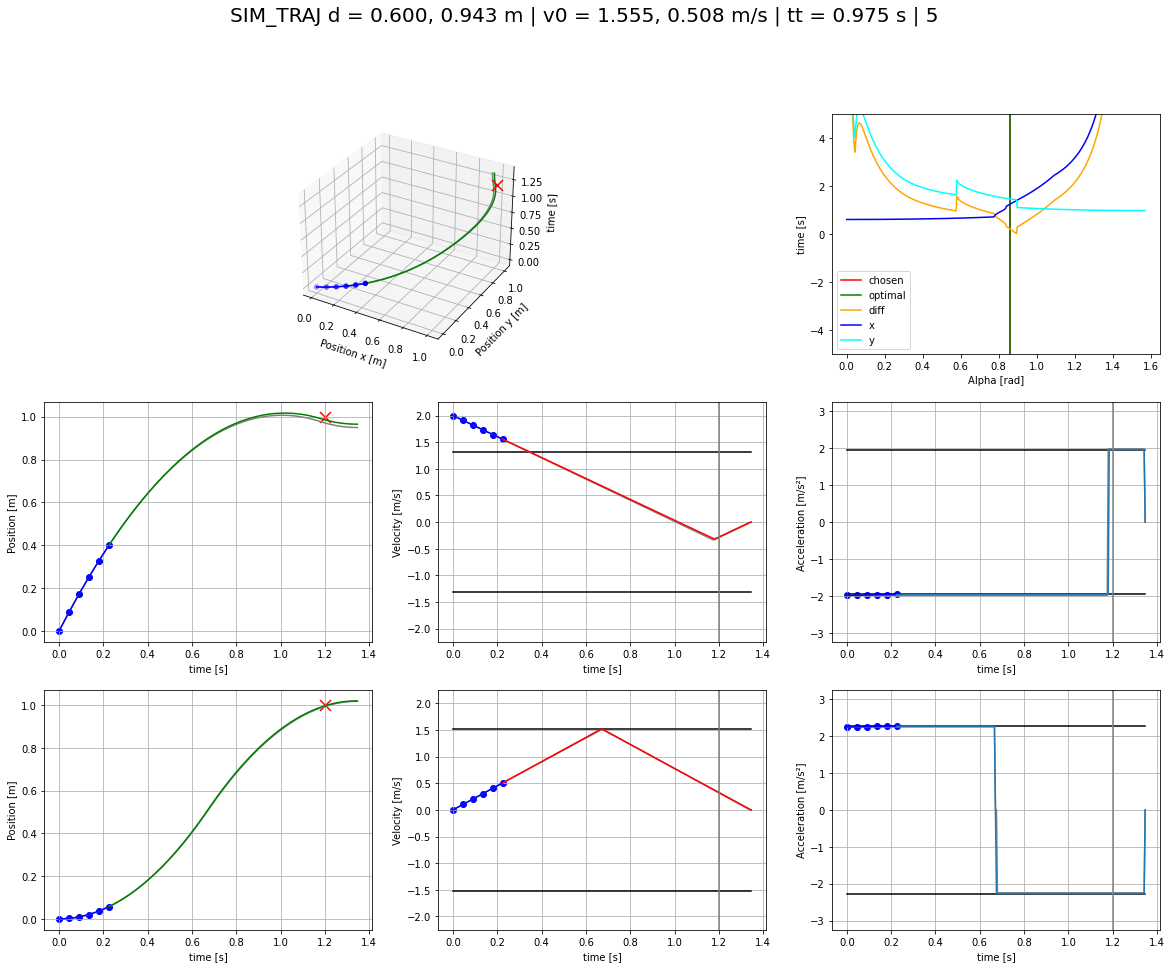

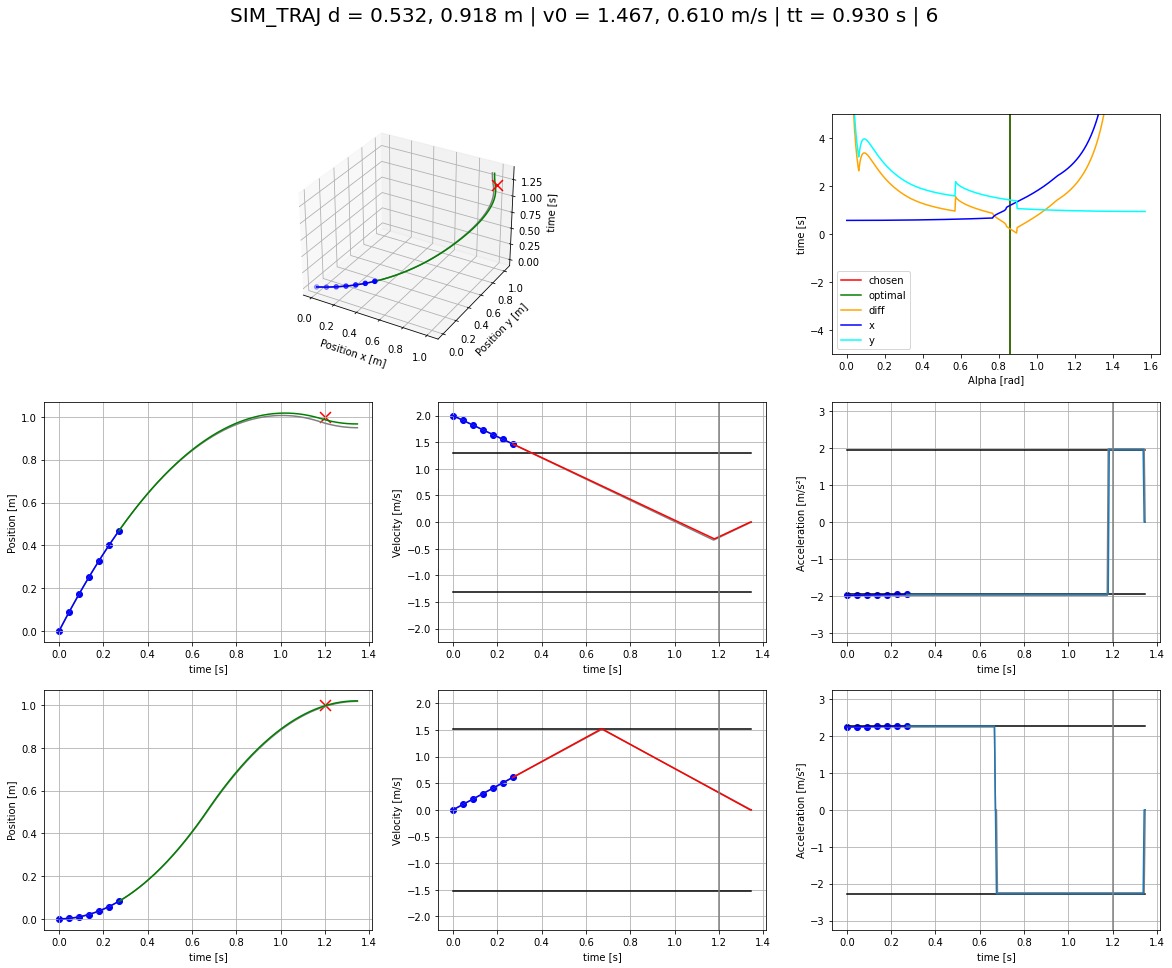

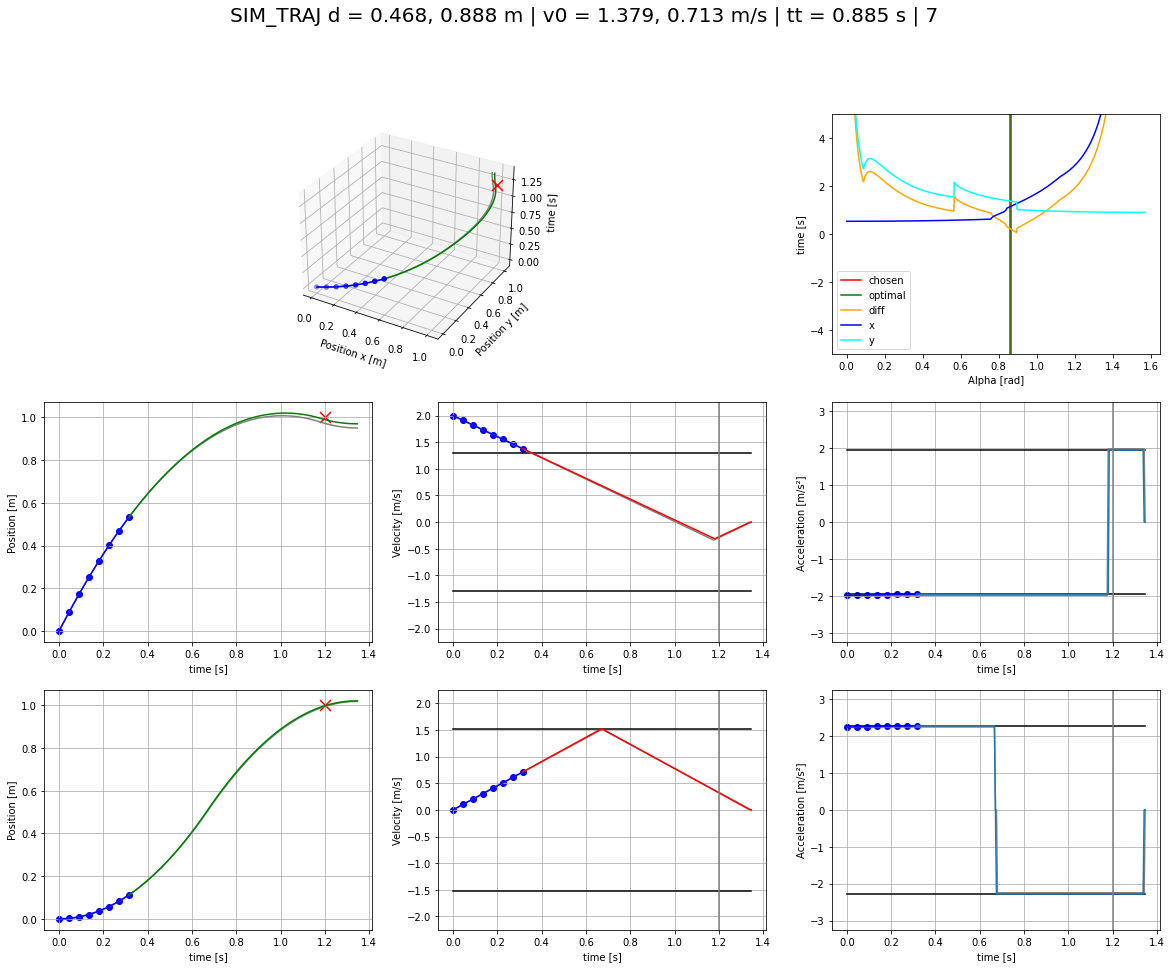

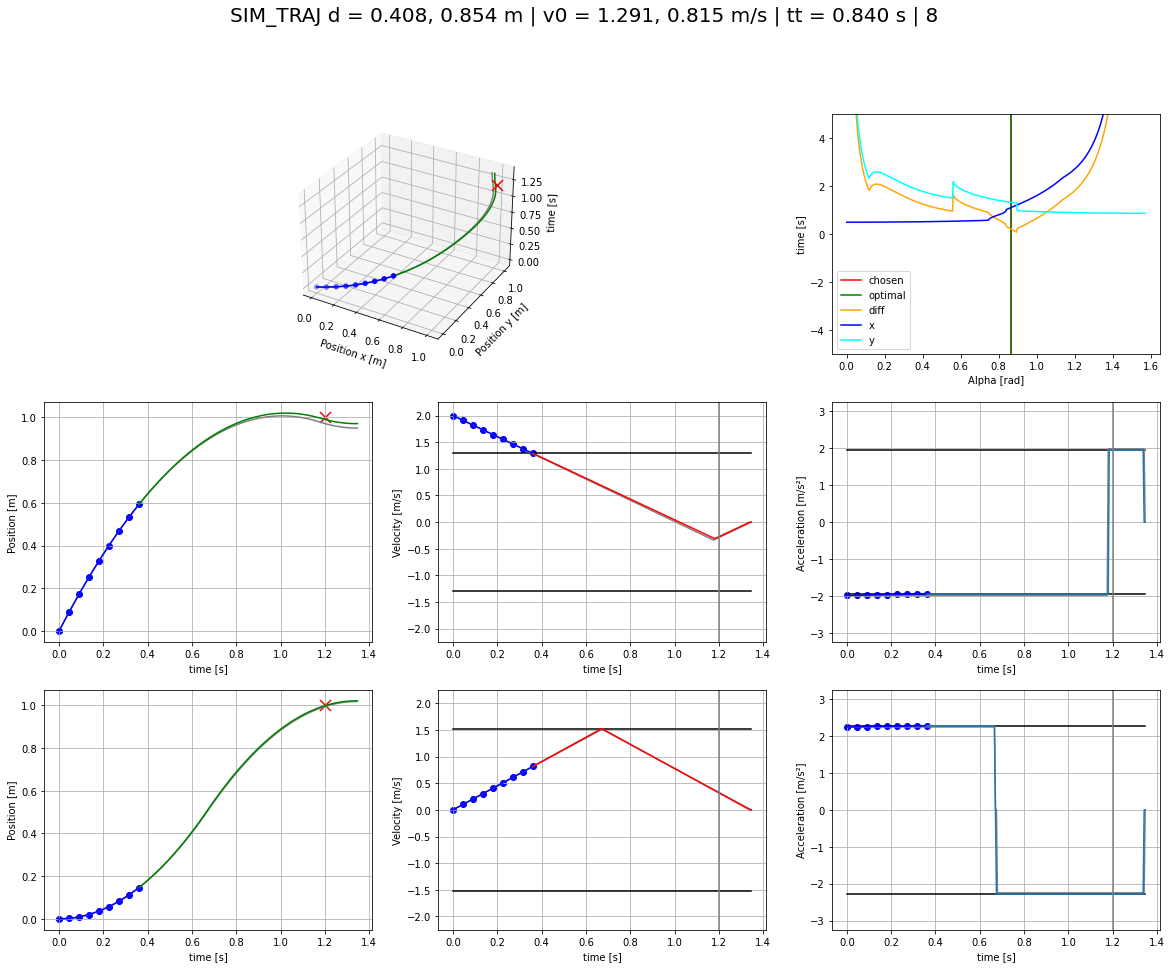

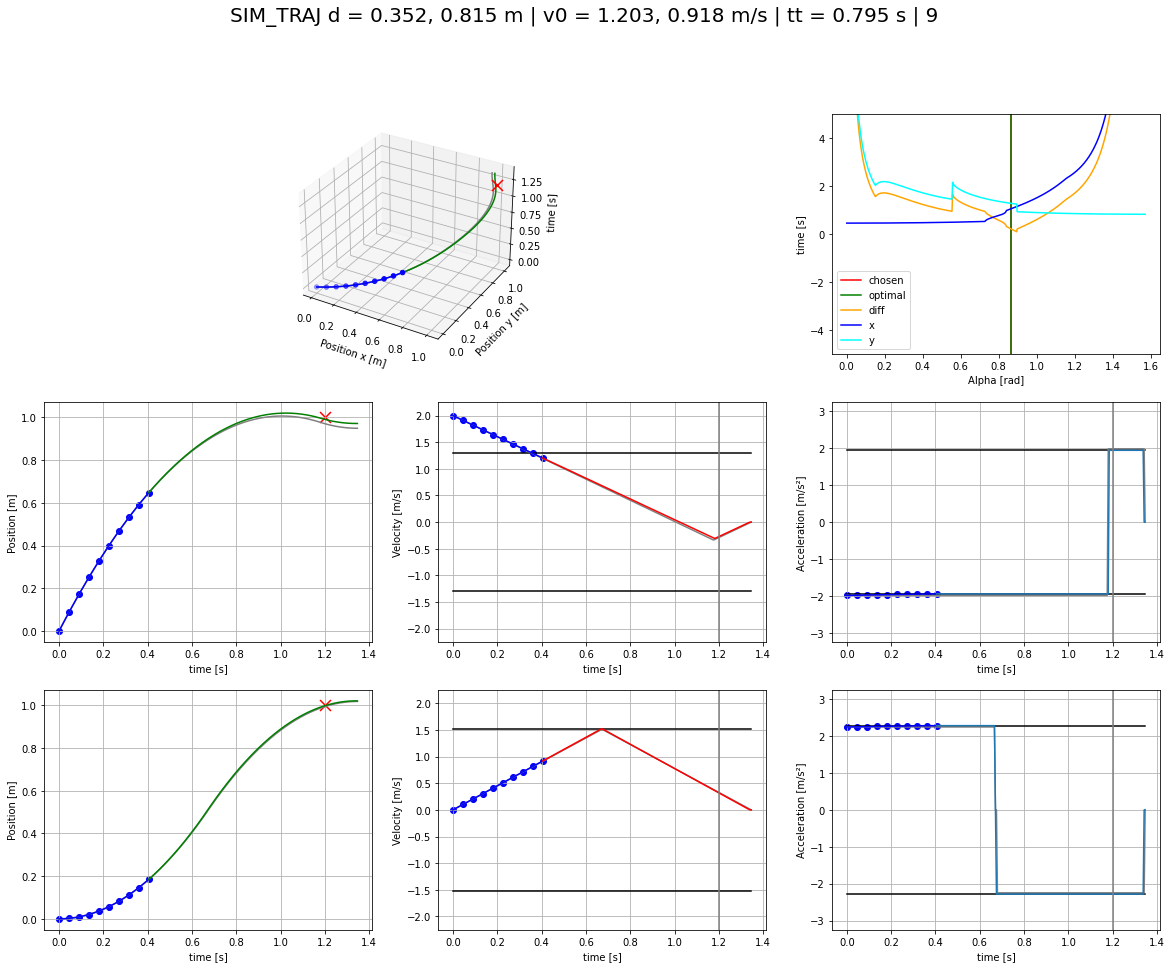

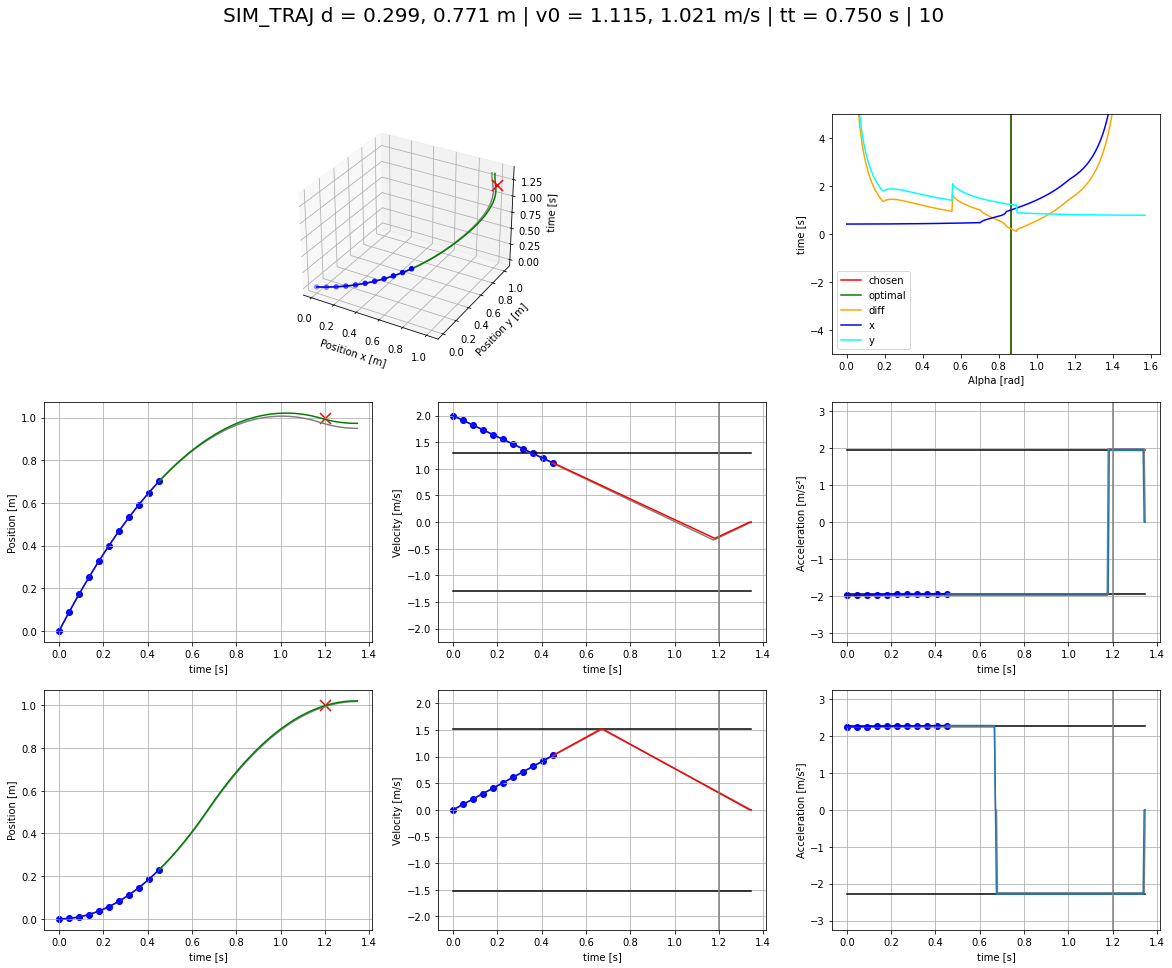

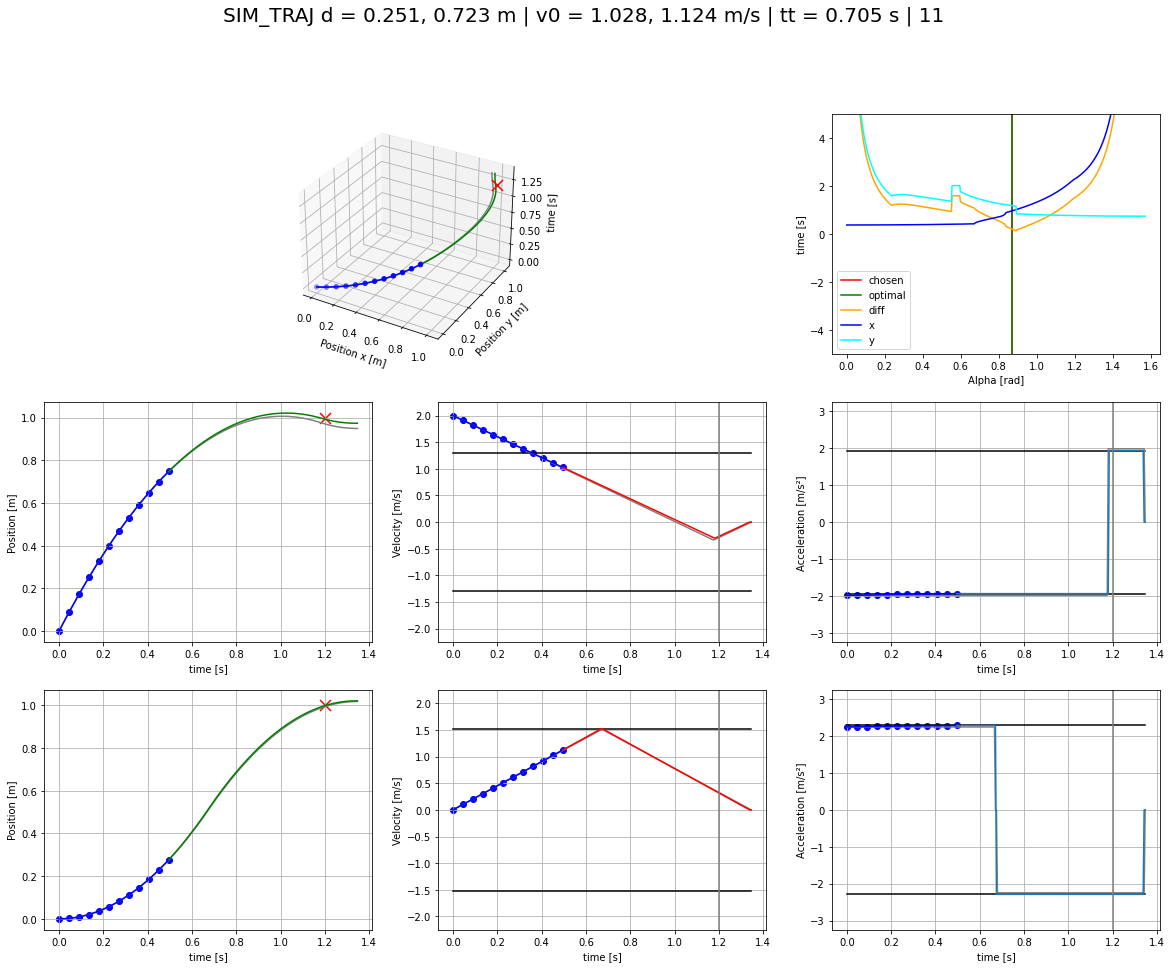

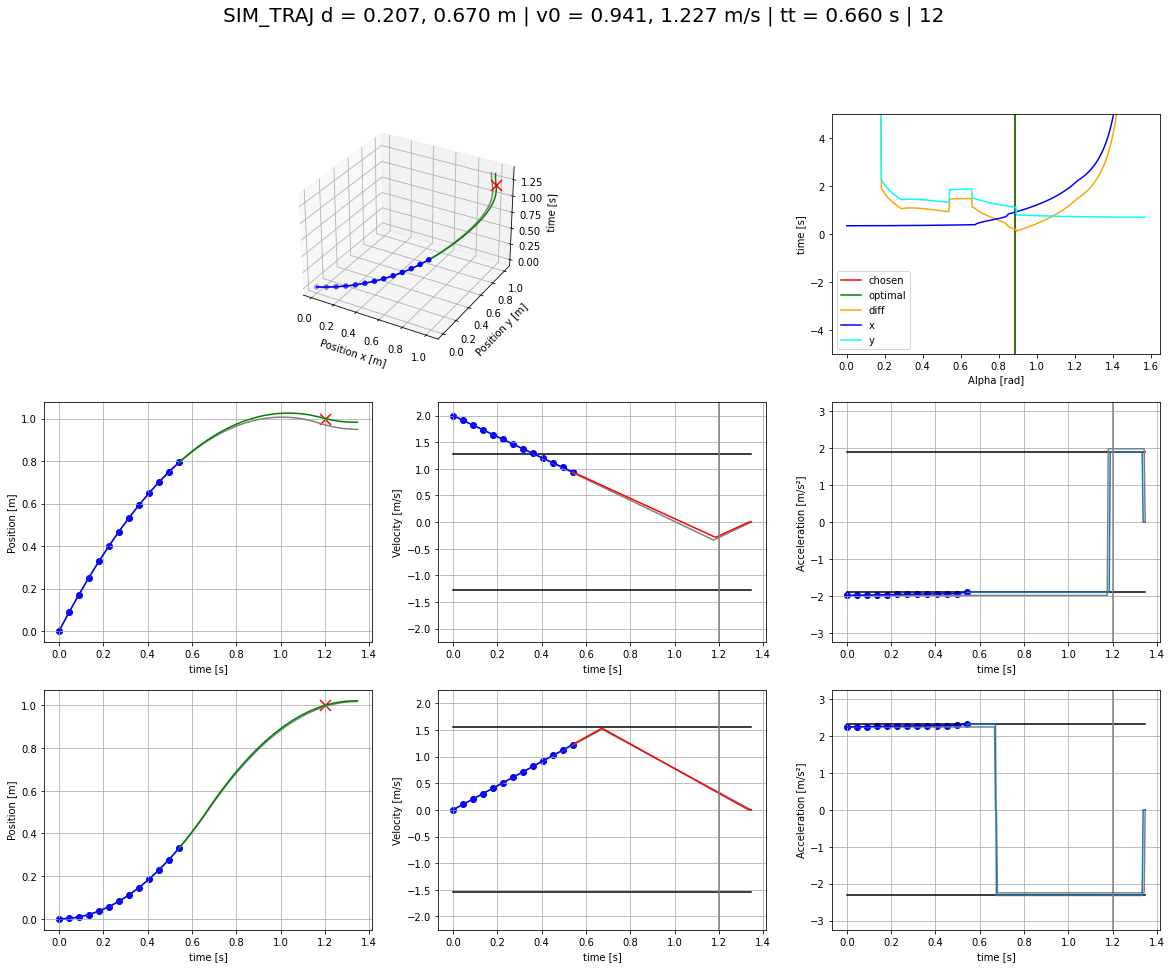

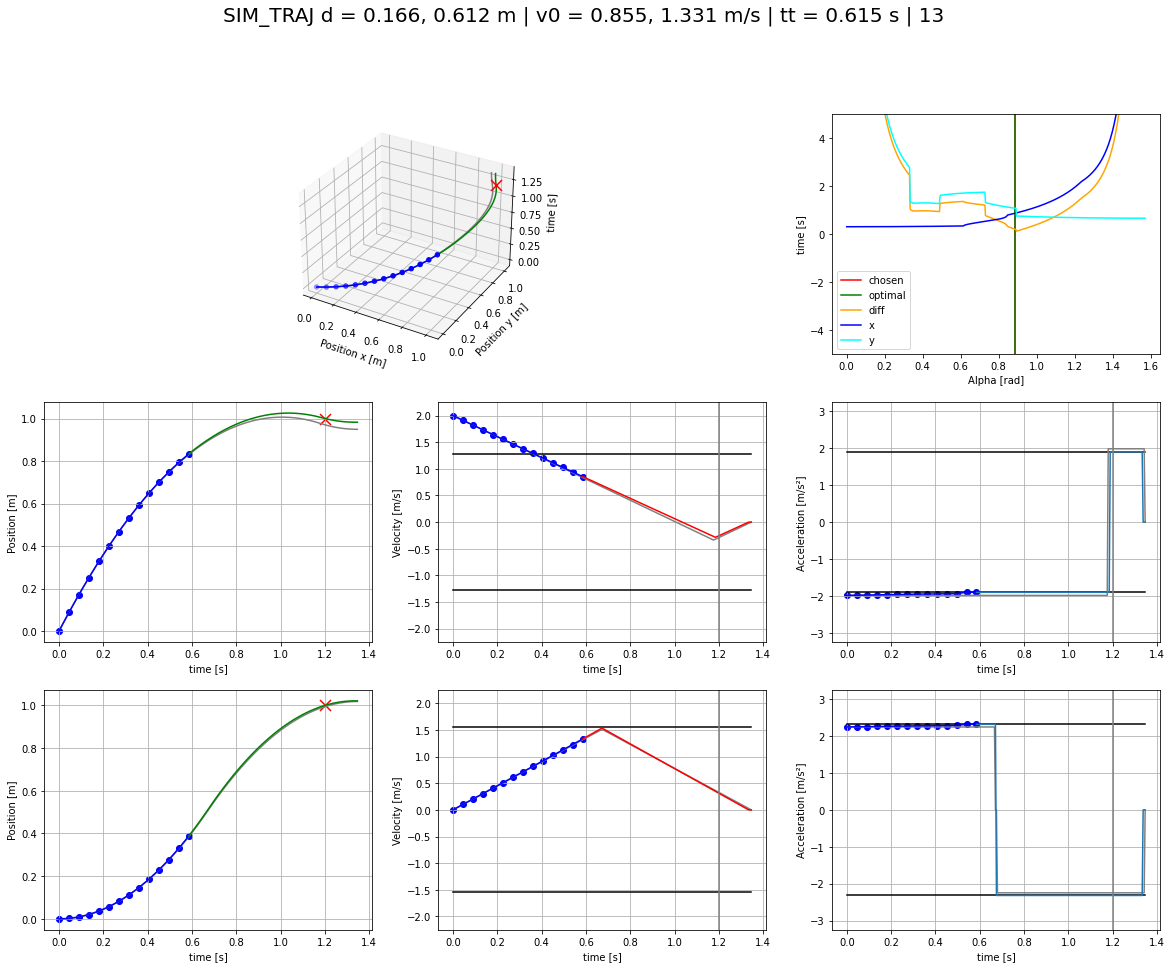

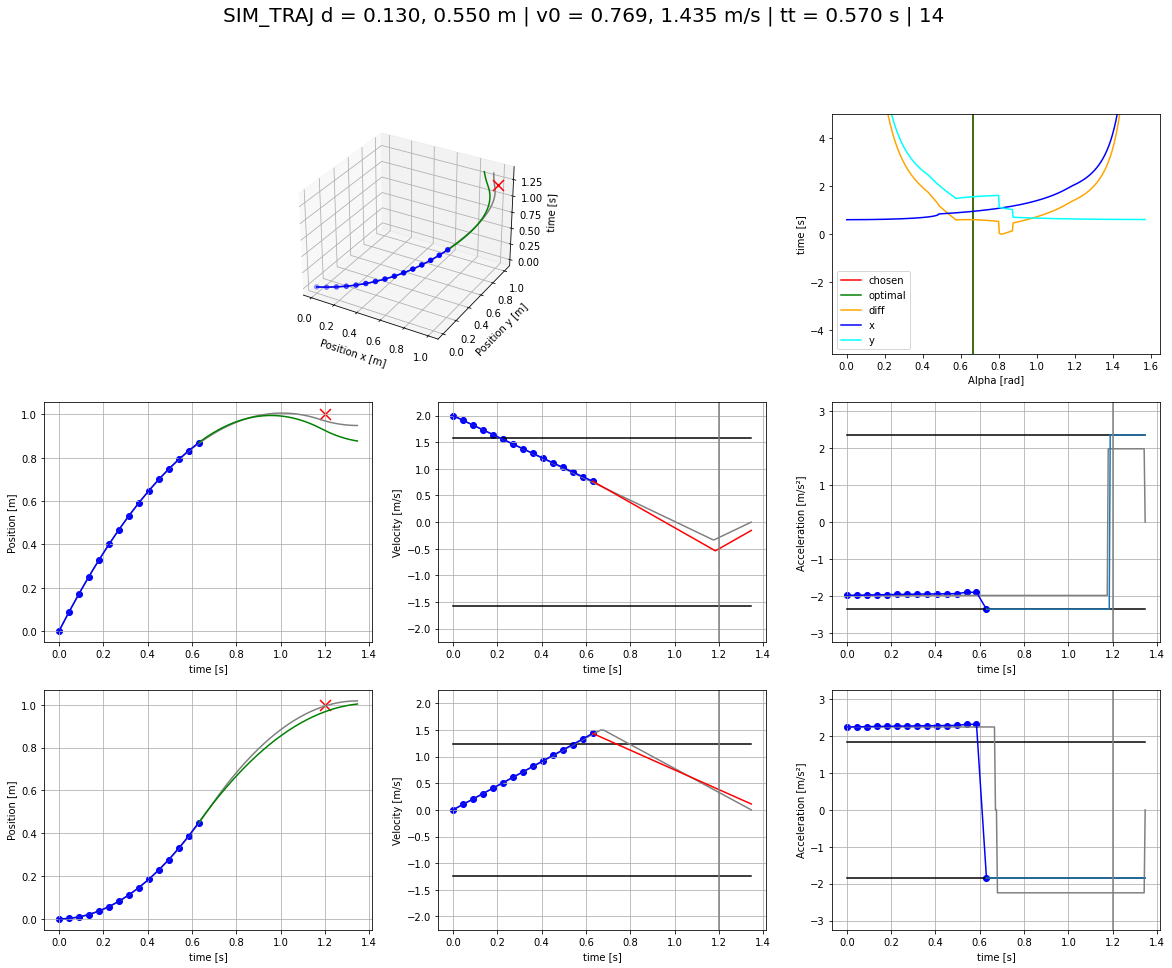

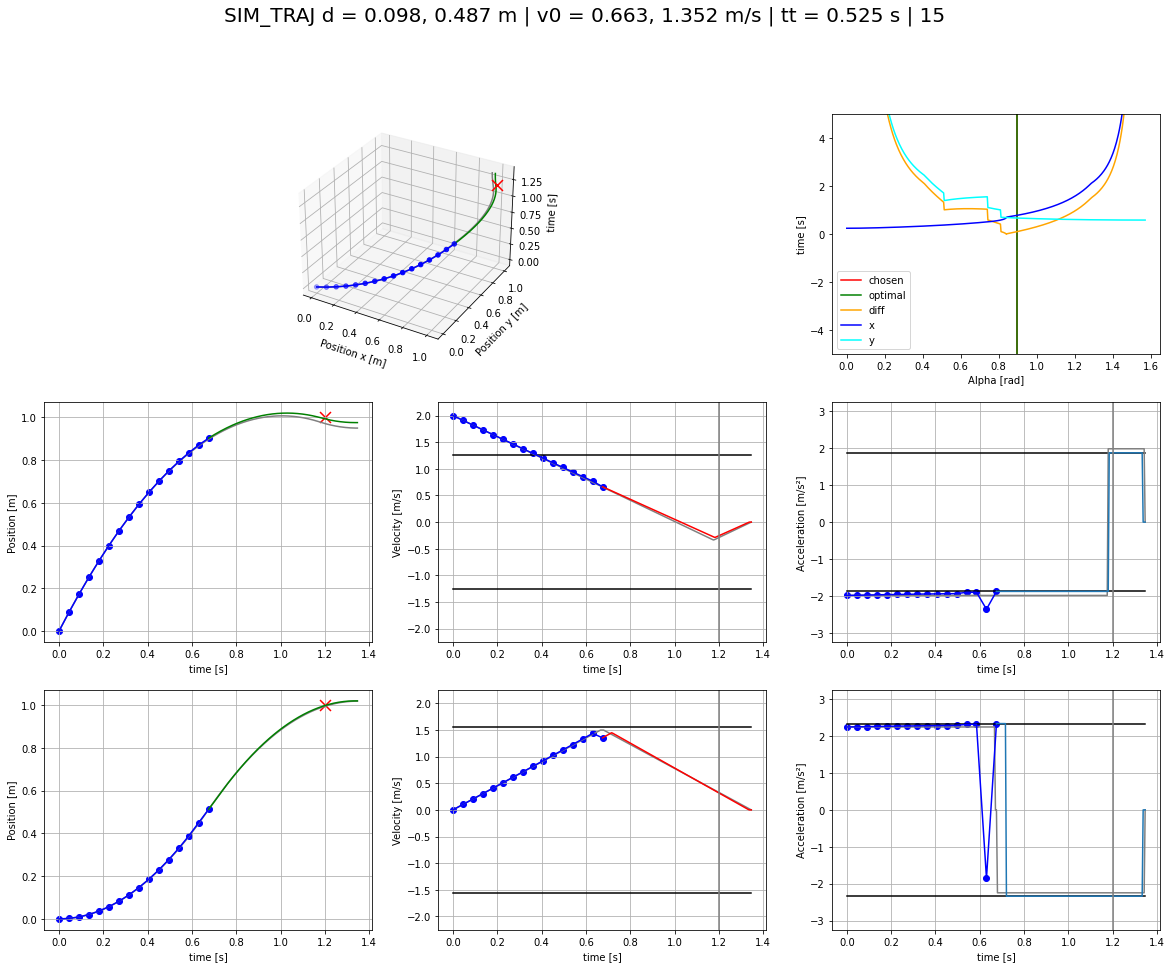

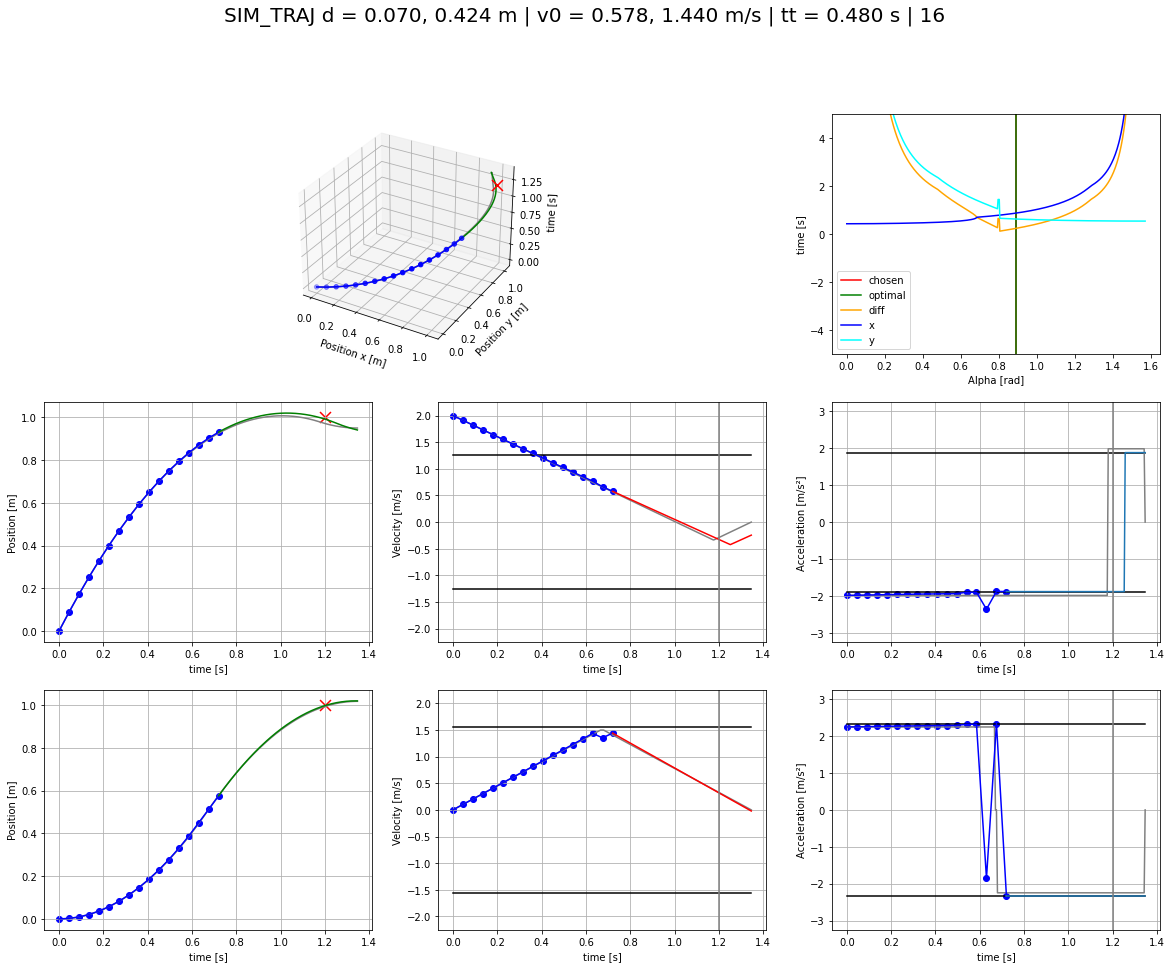

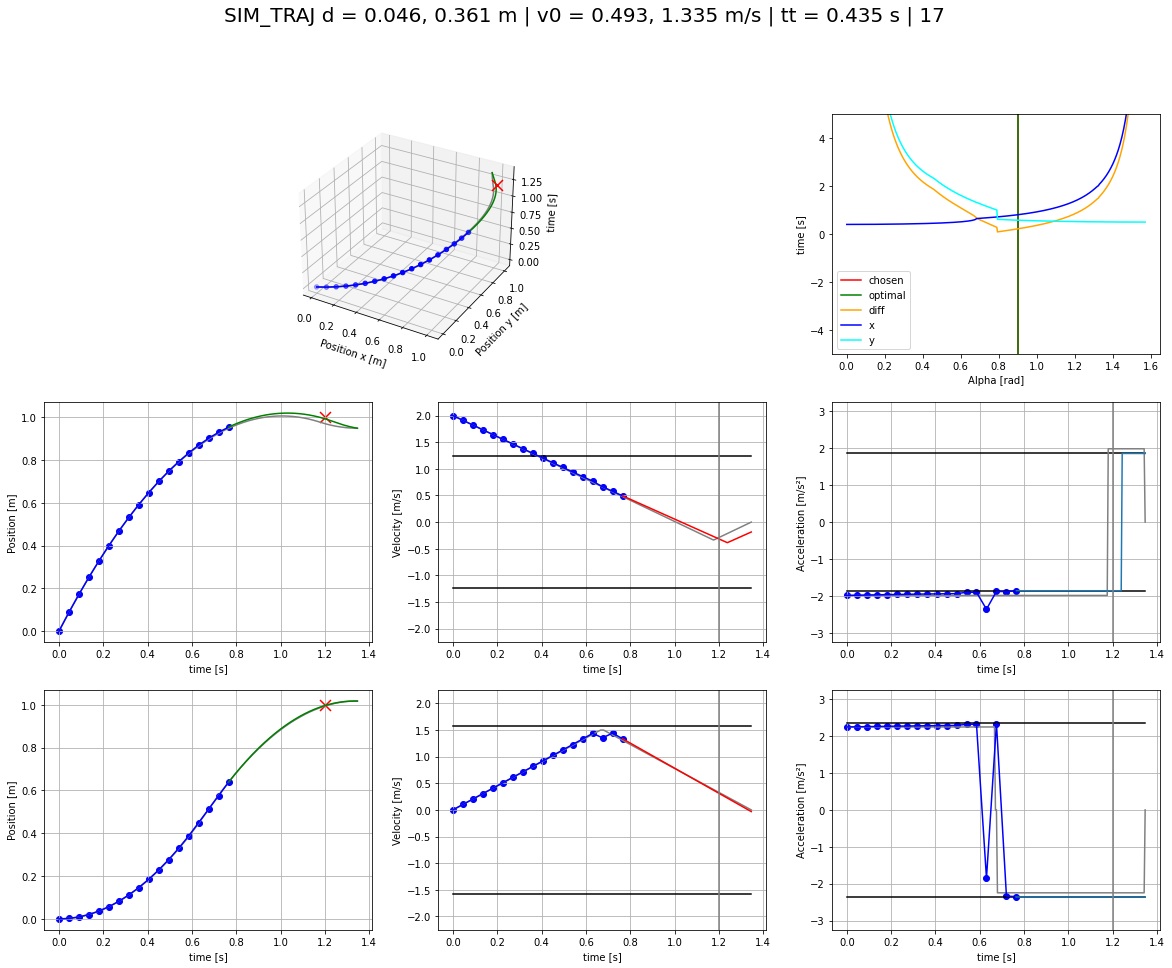

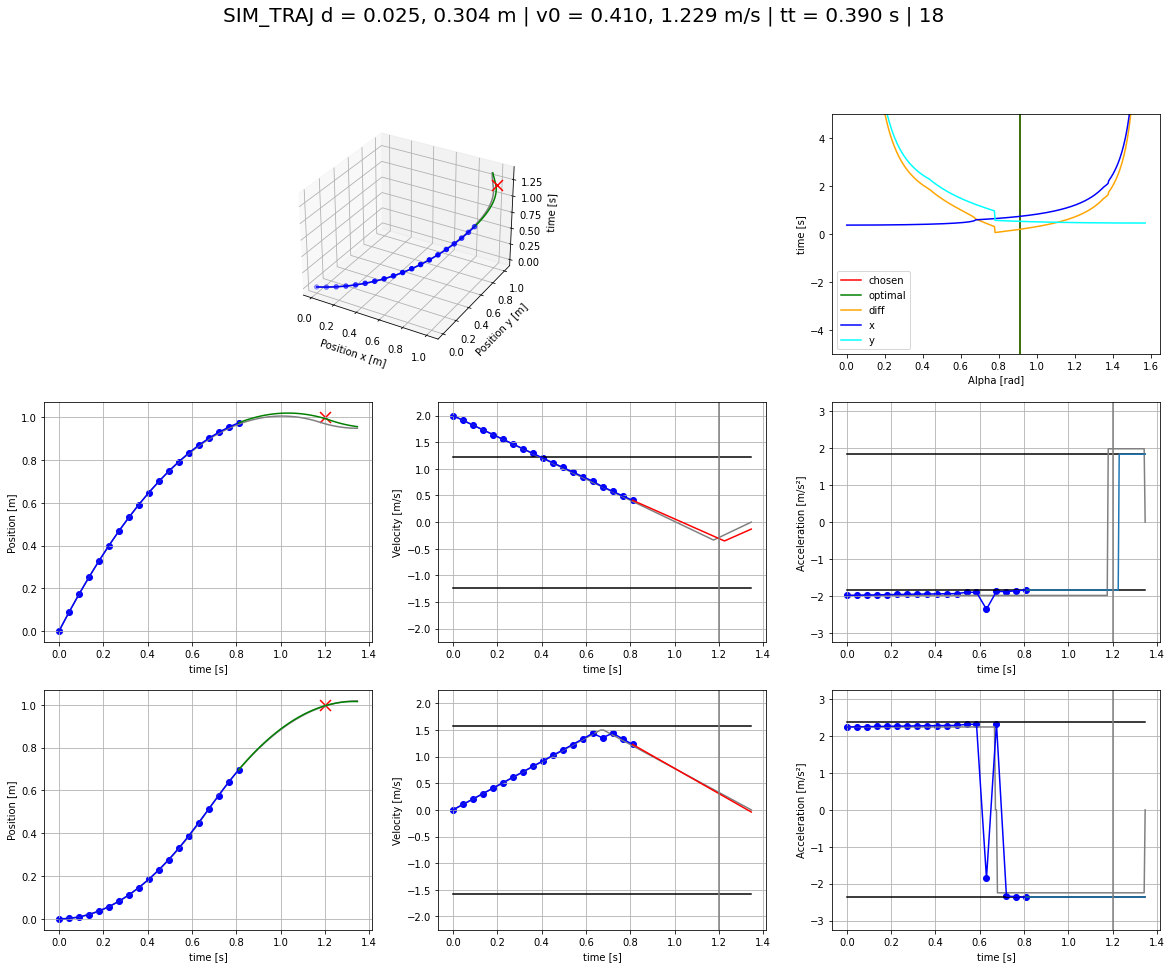

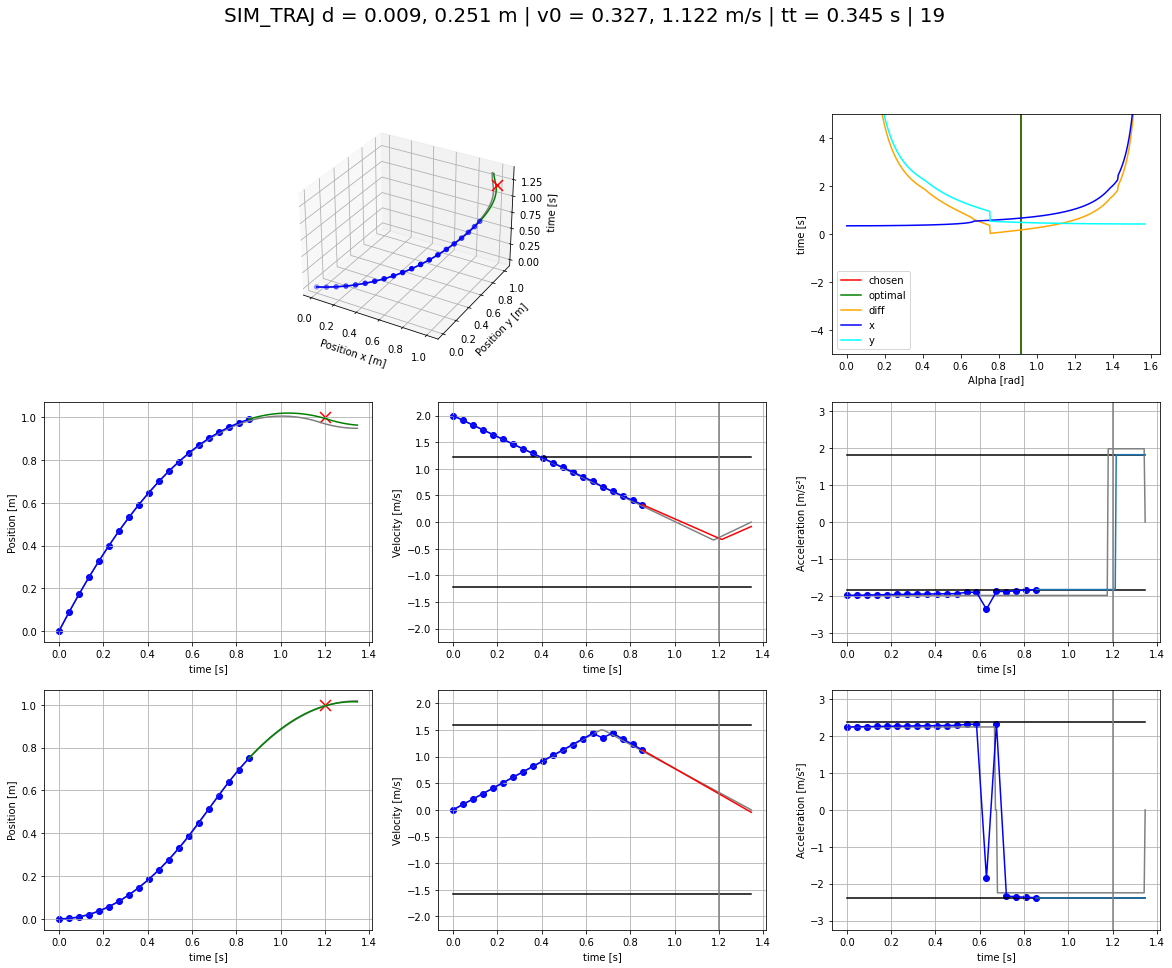

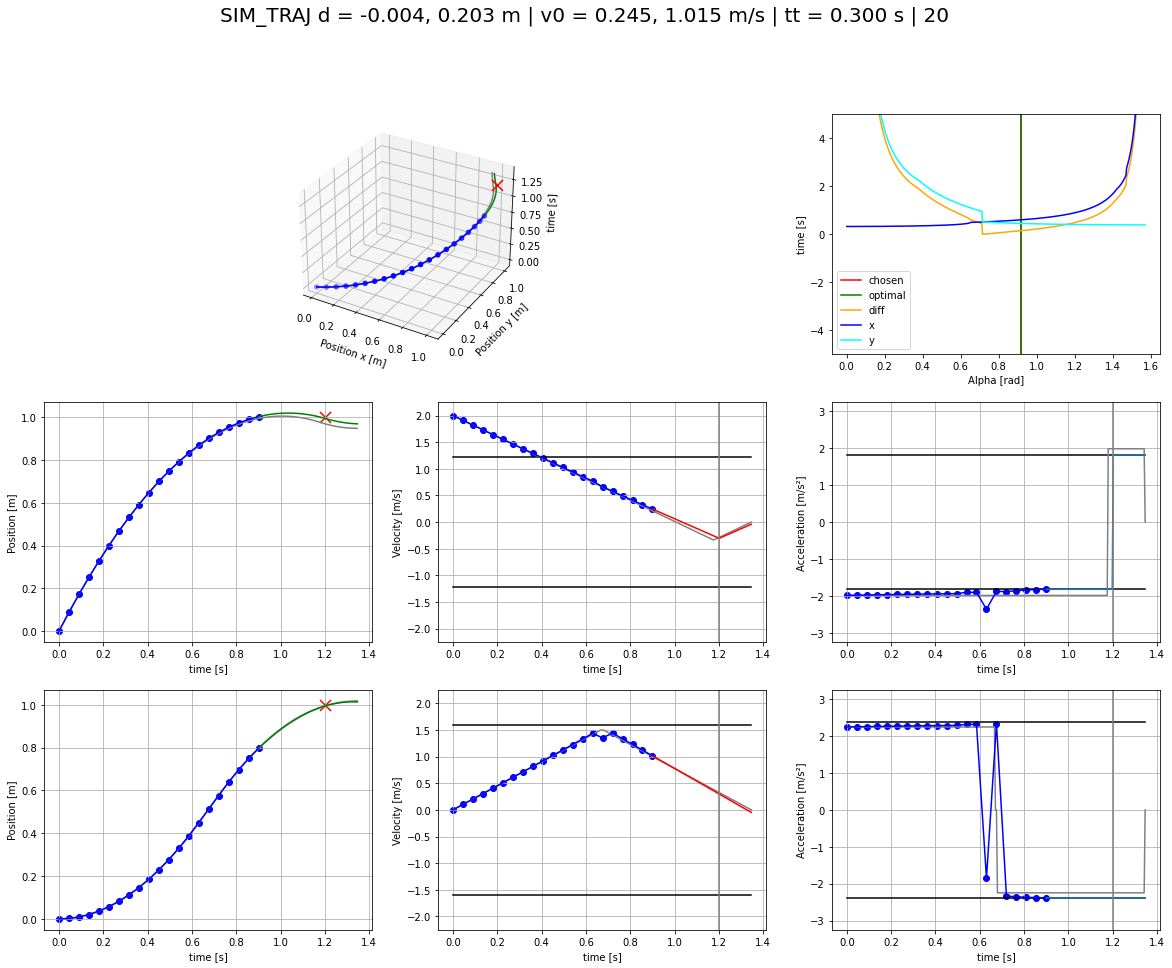

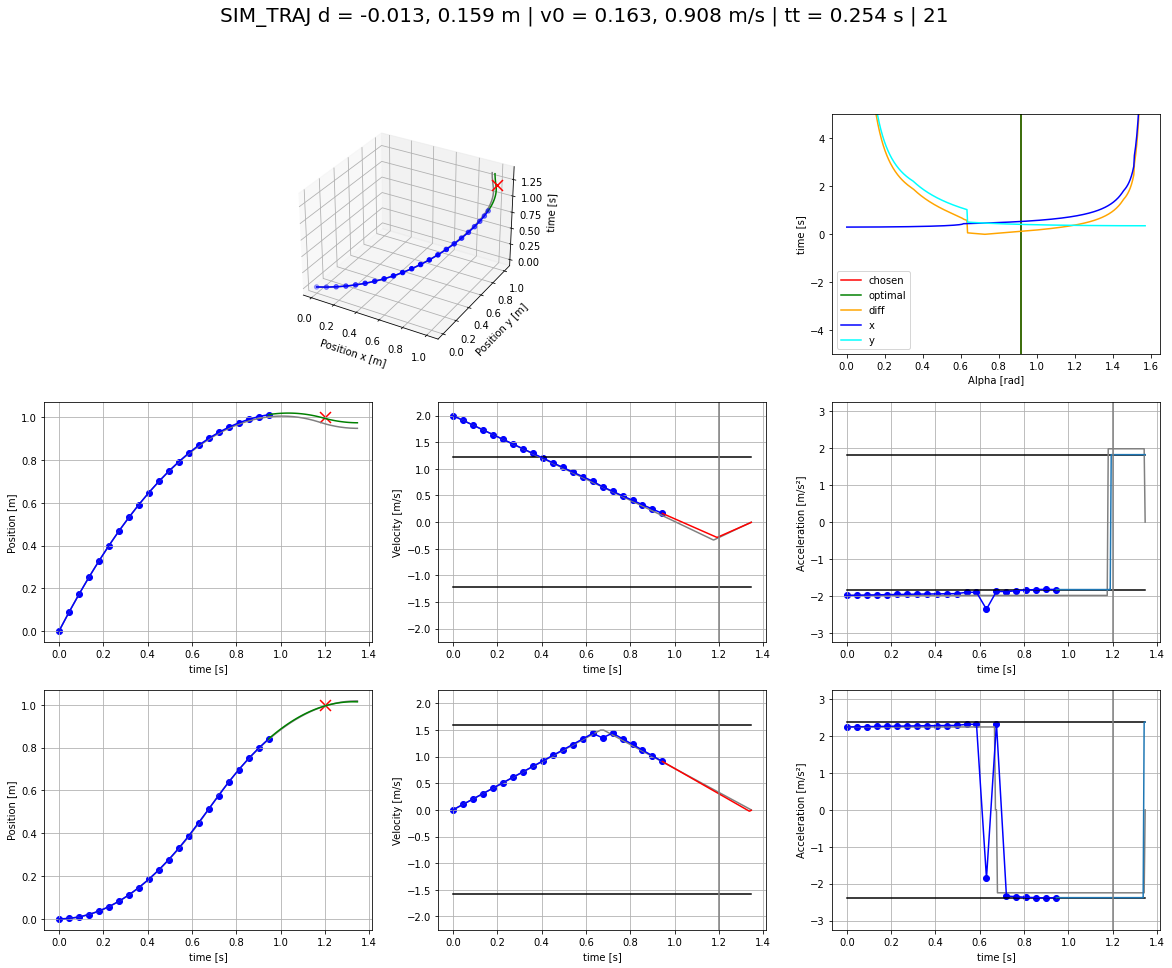

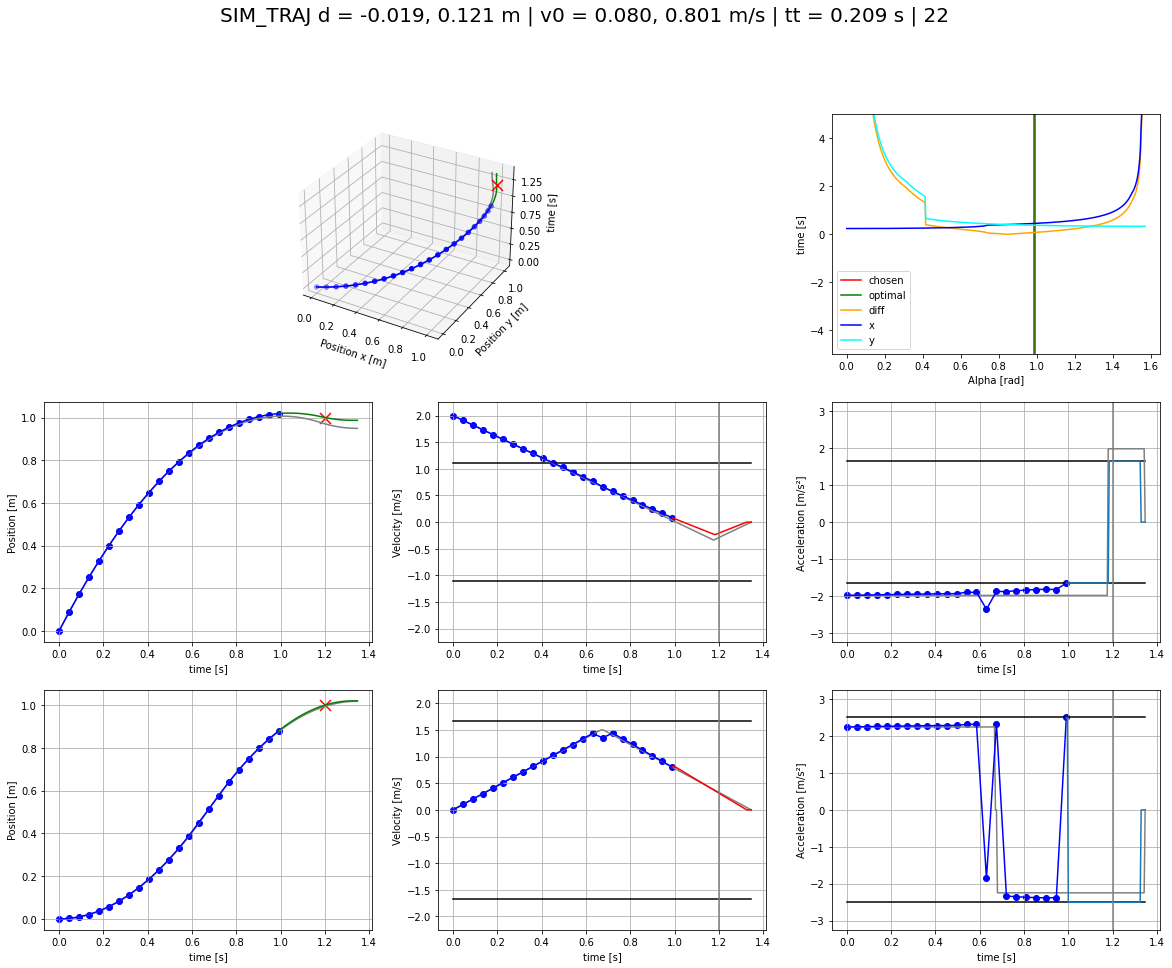

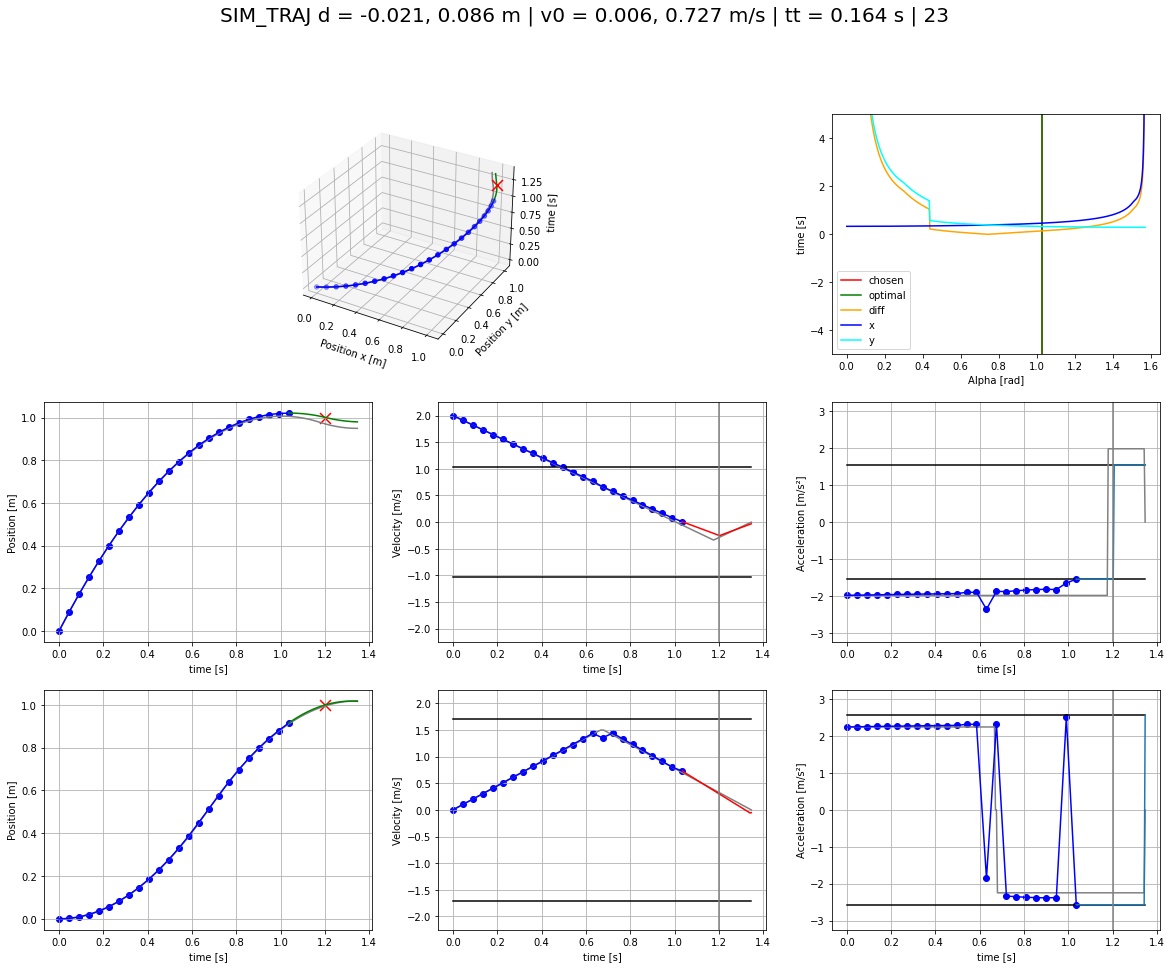

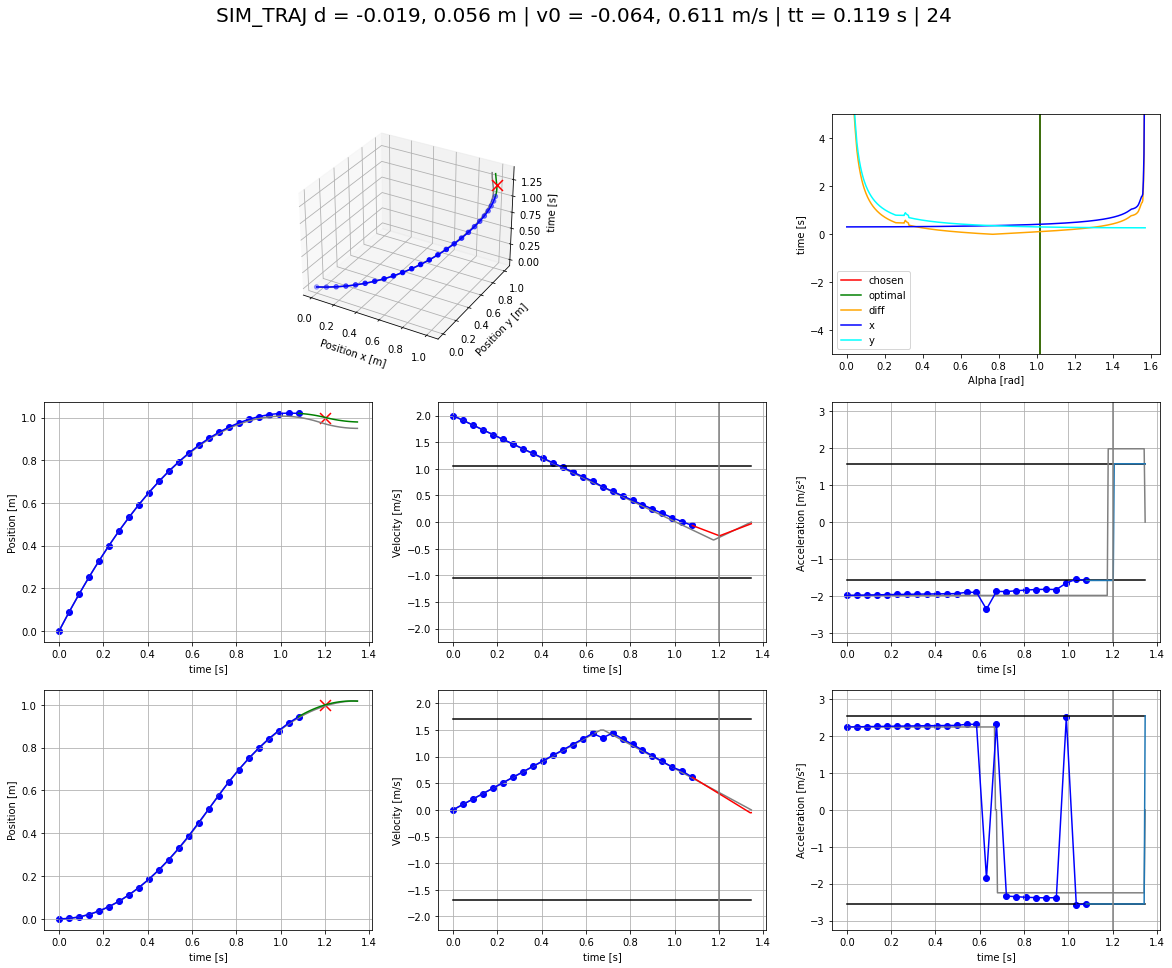

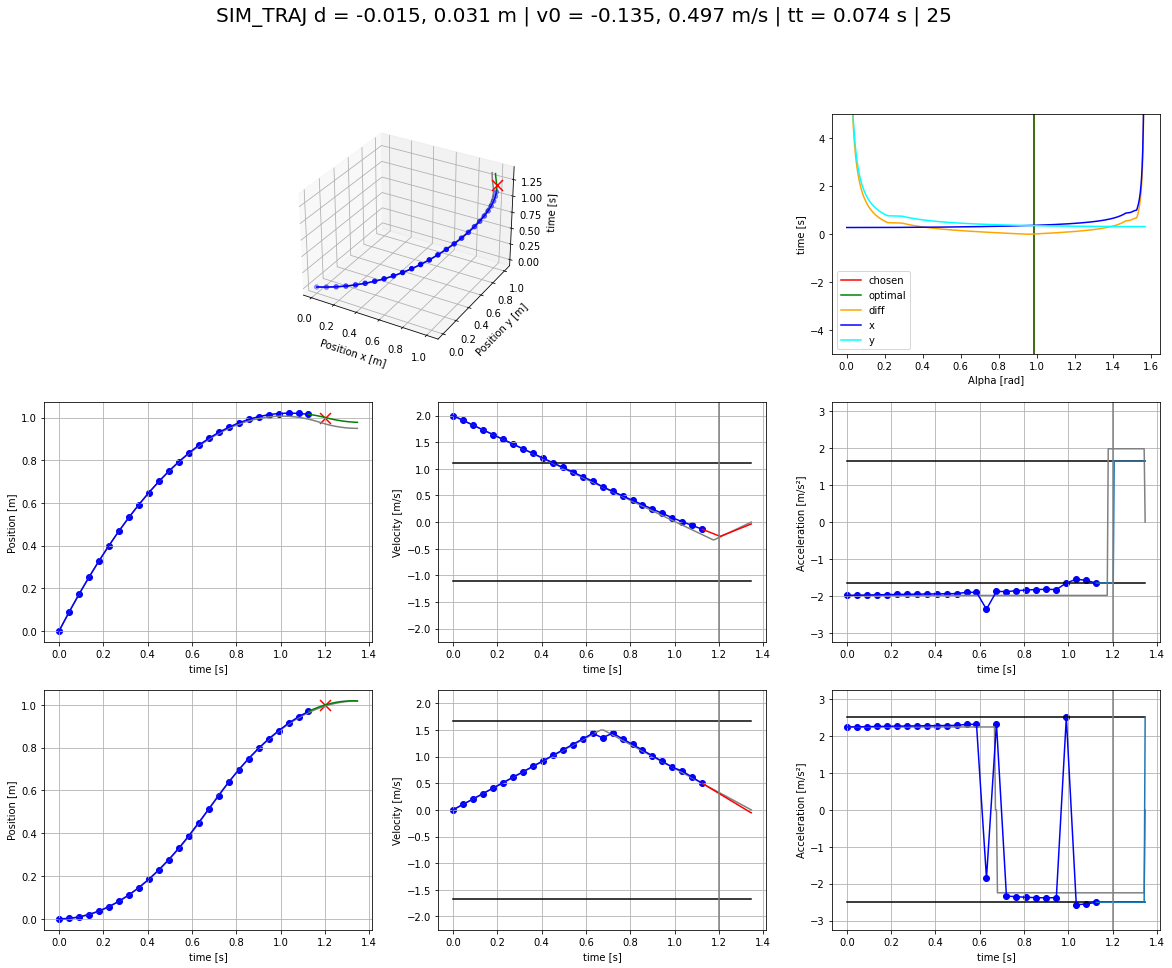

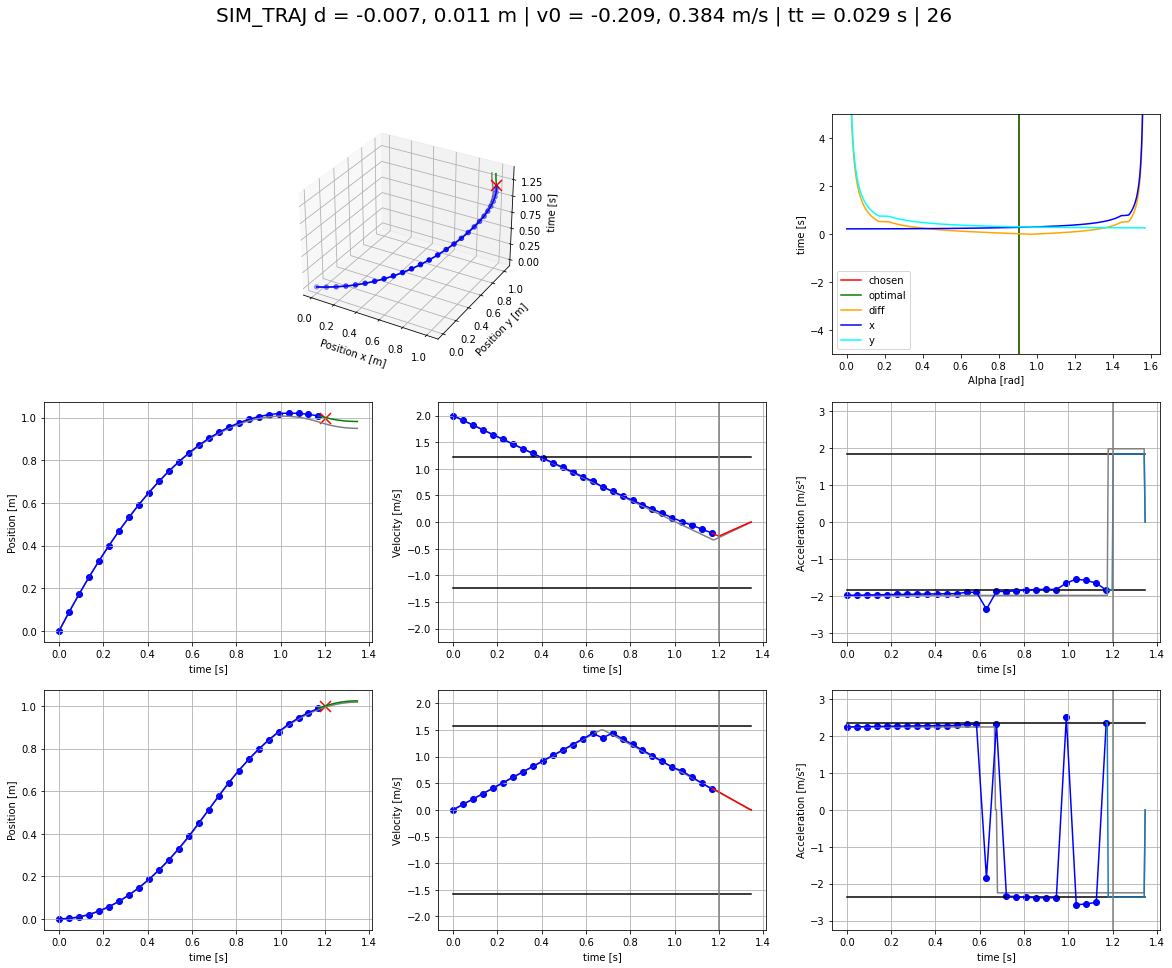

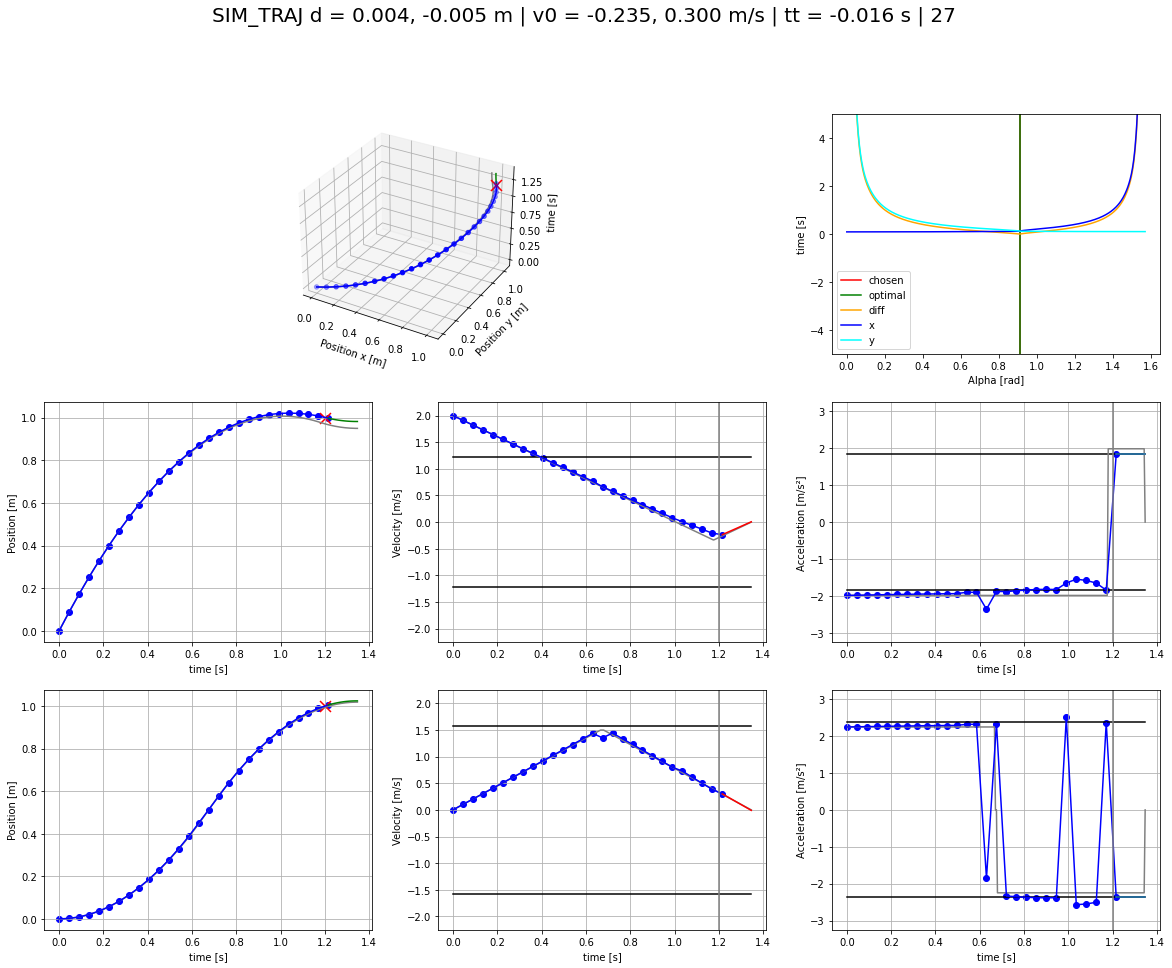

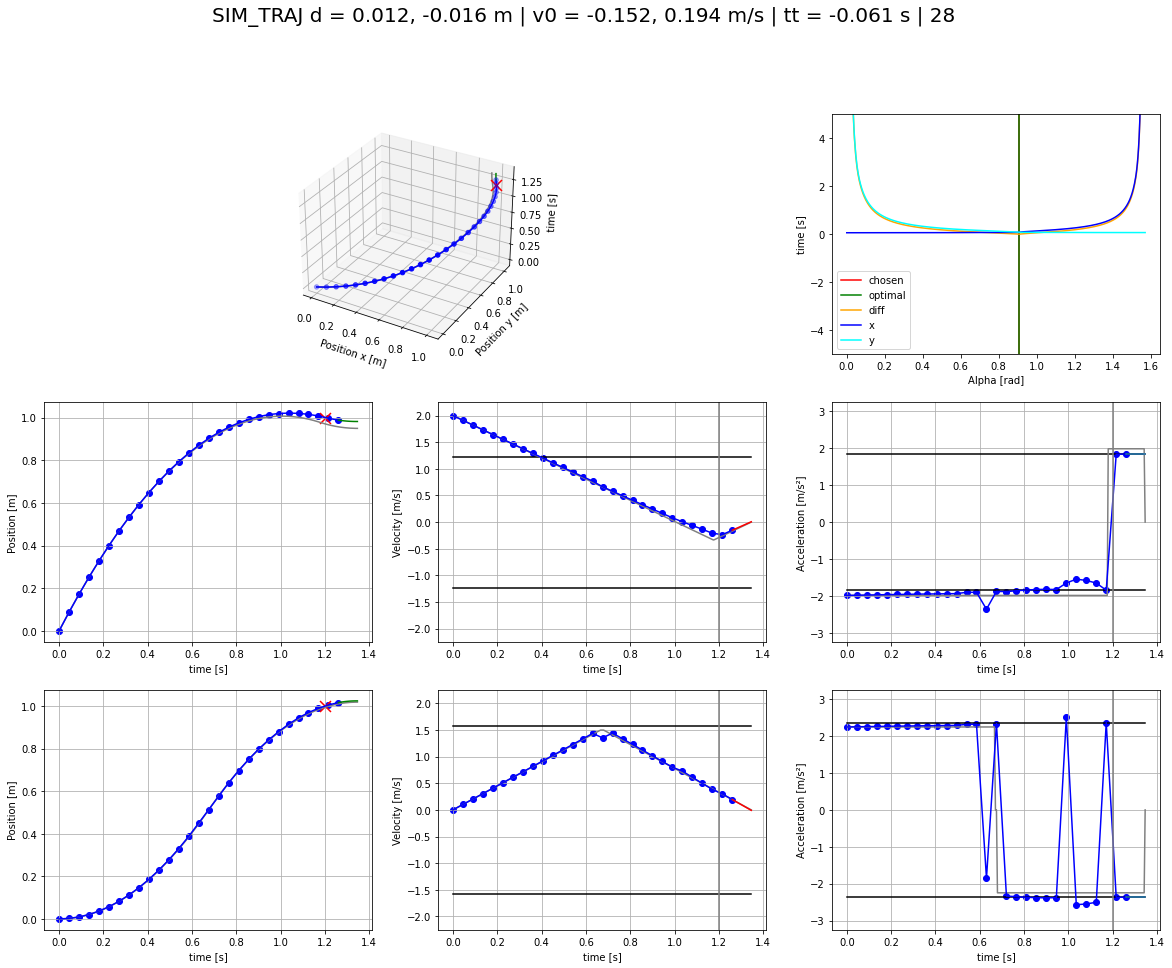

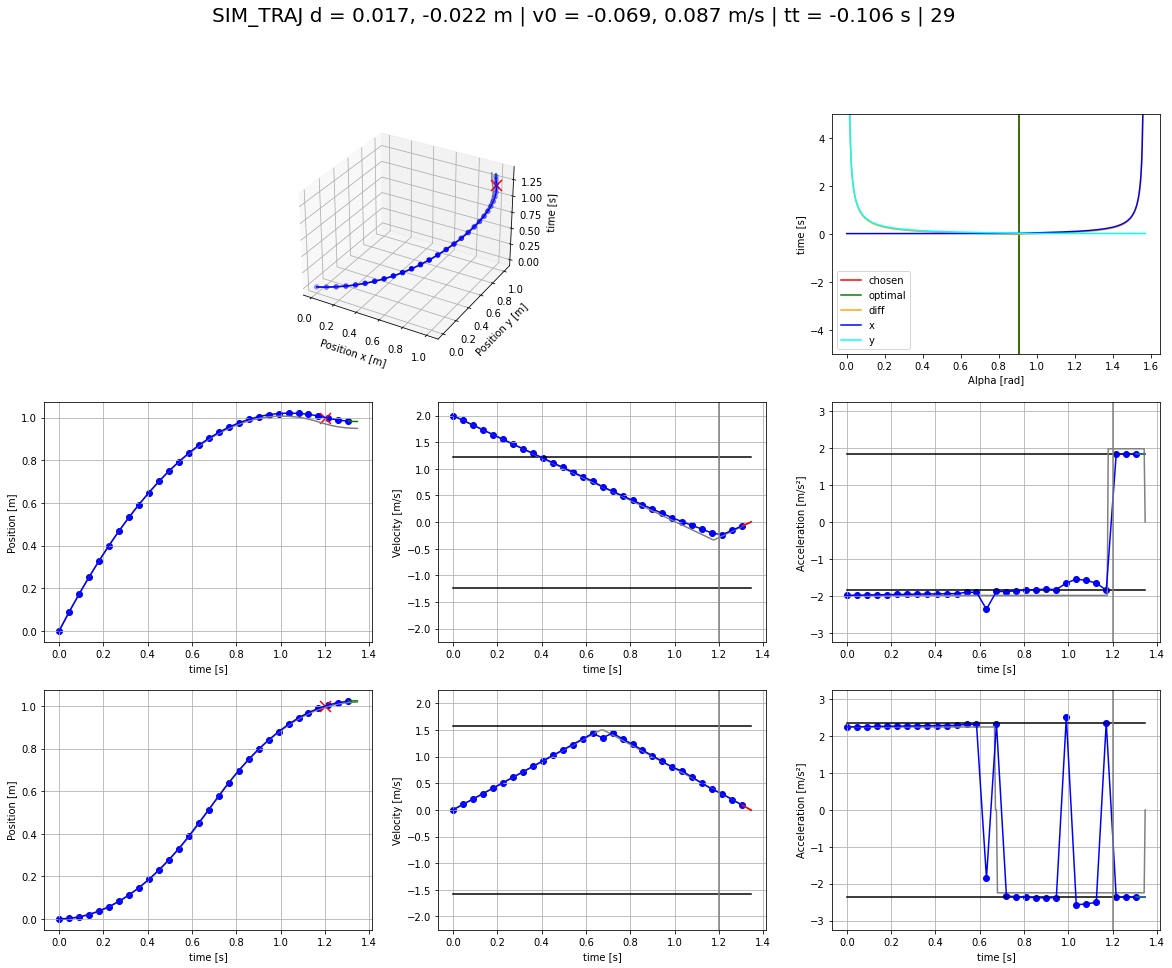

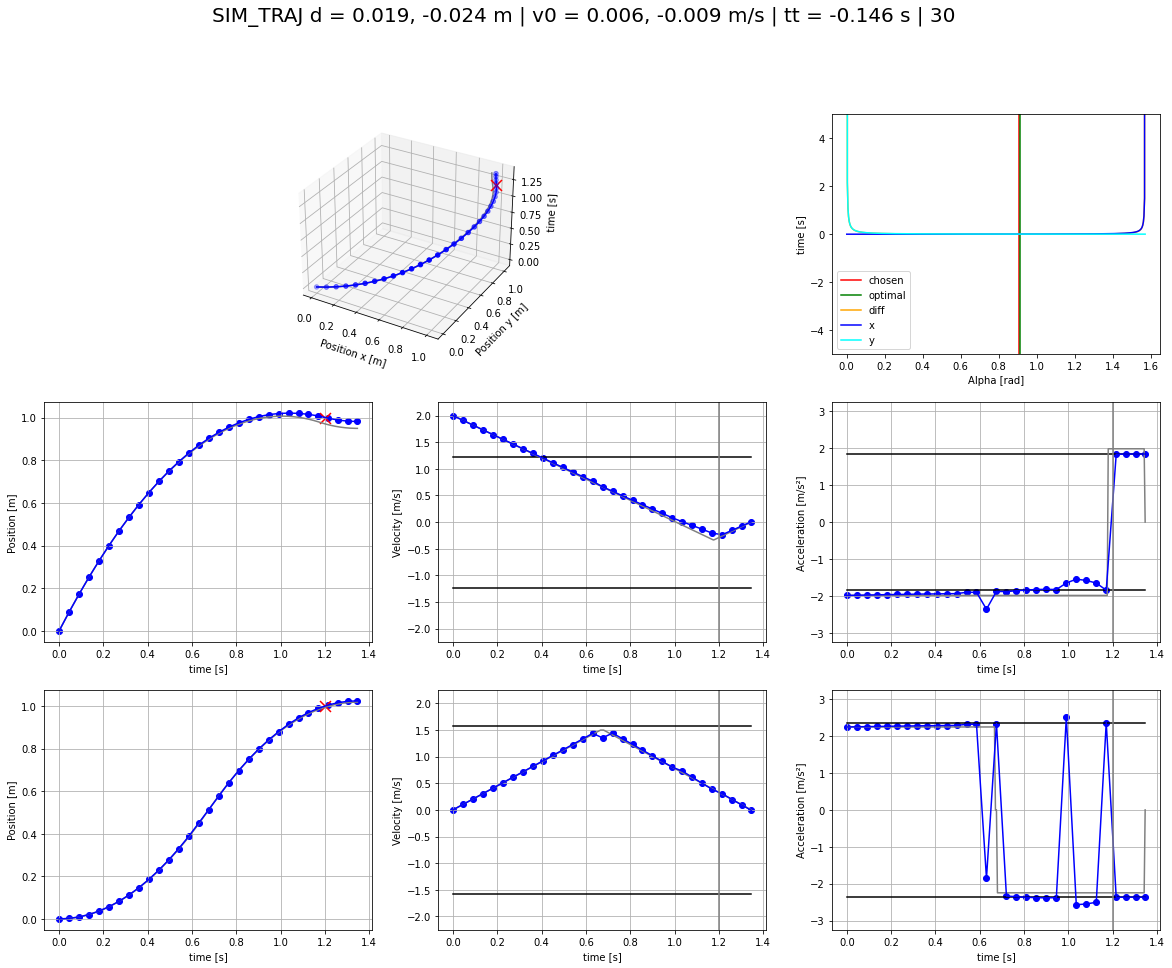

In [4]:
import numpy as np
import timeit

traj = Plotter.plot(Vec2(1.0, 1.0), Vec2(max_vel, 0.0), 1.2, max_vel, max_acc, PlotType.SIM_TRAJ, show_fig=False)
goal = traj.get_position(float("inf"))
Plotter.plot(goal, Vec2(max_vel, 0.0), None, max_vel, max_acc, PlotType.TRAJ)
Plotter.plot(Vec2(1.0, 1.0), Vec2(max_vel, 0.0), 1.2, max_vel, max_acc, PlotType.DIFF_ALPHA)
Plotter.plot(Vec2(1.0, 1.0), Vec2(max_vel, 0.0), None, max_vel, max_acc, PlotType.DIFF_ALPHA)

do_timeit = True
if do_timeit:
    BangBangTrajectory2D().generate(Vec2(0.0, 0.0), Vec2(1.0, 1.0), Vec2(max_vel, 0.0), max_vel, max_acc, 1e-3, 1.2)
    with_tt = timeit.repeat(
        "BangBangTrajectory2D().generate(Vec2(0.0,0.0), Vec2(1.0,1.0), Vec2(max_vel, 0.0), max_vel, max_acc, 1e-3, 1.2)",
        repeat=100, number=3, globals=globals())
    BangBangTrajectory2D().generate(Vec2(0.0, 0.0), Vec2(1.0, 1.0), Vec2(max_vel, 0.0), max_vel, max_acc, 1e-3, None)
    no_tt = timeit.repeat(
        "BangBangTrajectory2D().generate(Vec2(0.0,0.0), Vec2(1.0,1.0), Vec2(max_vel, 0.0), max_vel, max_acc, 1e-3, None)",
        repeat=100, number=3, globals=globals())

    print("With TargetTime: {:.3f}ms".format(np.average(with_tt) / 3 * 1e3))
    print("  No TargetTime: {:.3f}ms".format(np.average(no_tt) / 3 * 1e3))

alpha = 0.785397976143934029025217569142114371061325073242187500000000
x_max_vel = math.cos(alpha) * max_vel
y_max_vel = math.sin(alpha) * max_vel
x_max_acc = math.cos(alpha) * max_acc
y_max_acc = math.sin(alpha) * max_acc
Plotter.plot(1.0, max_vel, 1.2, x_max_vel, x_max_acc, PlotType.TRAJ)
Plotter.plot(1.0, 0.0, 1.2, y_max_vel, y_max_acc, PlotType.TRAJ)

In [ ]:

assert 1 == 0
offset = 1
distance = Vec2(1.0, 1.0)
original = Plotter.plot(distance, Vec2(max_vel, 0.0), None, max_vel, max_acc, PlotType.TRAJ, save_fig=True)
if isinstance(original, BangBangTrajectory2D):
    offset_alpha = Vec2(math.cos(original.alpha) * offset, math.sin(original.alpha) * offset)
    Plotter.plot(distance + offset_alpha, Vec2(max_vel, 0.0), None, max_vel, max_acc, PlotType.TRAJ, save_fig=True)

    original_angle = math.atan(distance.y / distance.x)
    offset_original = Vec2(math.cos(original_angle) * offset, math.sin(original_angle) * offset)
    Plotter.plot(distance + offset_original, Vec2(max_vel, 0.0), None, max_vel, max_acc, PlotType.TRAJ, save_fig=True)




In [ ]:
raise NotImplemented

distances = [Vec2(1.5, 3)]
initial_velocities = [Vec2(0, 2)]
target_times = [1]

for d in sorted(set(distances)):
    for i_v in sorted(set(initial_velocities)):
        for tt in sorted(set(target_times)):
            fig = Plotter.plot(d, i_v, tt, max_vel, max_acc, PlotType.TRAJ)

In [ ]:
Plotter.plot(Vec2(0.548, -2.942), Vec2(-1.229, -0.234), 2.9495631519290217 - 0.4022954059789714, max_vel=max_vel,
             max_acc=max_acc, plot_type=PlotType.TRAJ)

In [ ]:
test_values = [
    (0.0, 0.0, 0.0),
    (0.0, 1.0, 0.0),
    (0.0, 1.0, 1.0),
    (0.0, 1.0, 1.1),
    (0.5, 2.0, 0.5),
    (0.5, 2.0, 0.92),
    (1.0, 1.0, 0.5),
    (1.0, 1.0, 0.6),
    (1.0, 1.0, 1.0),
    (2.0, 2.0, 1.1),
    (2.0, 2.0, 2.0),
    (1.0, 0.0, 1.0),
]

for values in test_values:
    Plotter.plot(values[0], values[1], values[2], max_vel, max_acc, PlotType.NONE)

In [ ]:
test_values = [
    ((-1.5, -3), (2, 0), 2.3),
    ((1, 0.5), (0, 0), 1),
    ((-1.5, -3), (0, 0), 2.2),
    ((-1, 0.5), (0, 0), 1),
    ((-1.5, -3), (0, 0), 2.6),
    ((-1.5, -3), (0, 0), 2.5),
    ((-1.5, -3), (0, 0), 2.4),
    ((-1.5, -3), (0, 0), 2.3),
]

for value in test_values:
    distance = Vec2(*value[0])
    initial_vel = Vec2(*value[1])
    target_time = value[2]
    Plotter.plot(distance, initial_vel, target_time, max_vel, max_acc, PlotType.SIM_TRAJ, show_fig=False)
    Plotter.plot(distance, initial_vel, target_time, max_vel, max_acc, PlotType.TRAJ)

In [ ]:
random.seed(1)
t_diffs = []
t_outlier = []
for _ in range(100):
    distance_x = random.uniform(-3, 3)
    distance_y = random.uniform(-3, 3)
    distance = Vec2(distance_x, distance_y)
    v0x = random.uniform(-max_vel, max_vel)
    v0y = random.uniform(-max_vel, max_vel)
    v0 = Vec2(v0x, v0y)
    target_time = random.uniform(0, 3)

    if math.isclose(target_time, 0.0, abs_tol=1e-4) or (
            math.isclose(distance_x, 0.0, abs_tol=1e-4) and math.isclose(distance_y, 0.0, abs_tol=1e-4)):
        continue

    try:
        sim_steps = Simulator(
            max_vel=max_vel,
            max_acc=max_acc,
            num_steps=40,
            step_size=5,
            distance=distance,
            initial_vel=v0,
            target_time=target_time).simulate()
        for step in sim_steps:
            if isinstance(step, SimStep2d):
                t_diff_optimal = BangBangTrajectory2D.diff_for_alpha(step.optimal_alpha, step.pos[0], step.pos[-1],
                                                                     step.vel[0], max_vel, max_acc,
                                                                     step.times[-1] - step.times[0])[0]
                t_diff_chosen = BangBangTrajectory2D.diff_for_alpha(step.alpha, step.pos[0], step.pos[-1],
                                                                    step.vel[0], max_vel, max_acc,
                                                                    step.times[-1] - step.times[0])[0]
                t_diffs.append(step.optimal_alpha - step.alpha)
                if math.fabs(max(t_diff_chosen - t_diff_optimal, 0.0)) > 5:
                    Plotter.plot(step.pos[-1] - step.current_pos(), step.vel[0], step.times[-1] - step.times[0],
                                 max_vel, max_acc, PlotType.TRAJ)
                    plt.show()
                    print("({}),({}),{}".format(step.pos[-1] - step.current_pos(), step.vel[0],
                                                step.times[-1] - step.times[0]))

        if isinstance(distance, Vec2):
            if not math.isclose(sim_steps[-1].current_pos().x, distance.x, abs_tol=0.01) or not math.isclose(
                    sim_steps[-1].current_pos().y, distance.y, abs_tol=0.01):
                print("{} != {}".format(sim_steps[-1].current_pos().x, distance.x))
                print("{} != {}".format(sim_steps[-1].current_pos().y, distance.y))
                # Plotter.plot(distance, v0, target_time, max_vel, max_acc, PlotType.TRAJ)
        else:
            assert math.isclose(sim_steps[-1].current_pos(), distance, abs_tol=1e-2,
                                rel_tol=1e-4), "{} != {}".format(sim_steps[-1].current_pos(), distance)
    except Exception as e:
        print("({}), ({}), {} failed".format(distance, v0, target_time))
        raise AssertionError(e)
print("Success!")
print("Alphas Error: {} +- {}".format(np.average(t_diffs), np.std(t_diffs)))

In [ ]:
sorted(t_diffs, key=lambda d: math.fabs(d))[-100:]

In [ ]:
test_values = [
    (0.0, 0.0, 0.0),
    (0.0, 1.0, 0.0),
    (0.0, 1.0, 1.0),
    (0.0, 1.0, 1.1),
    (0.5, 2.0, 0.5),
    (0.5, 2.0, 0.92),
    (1.0, 1.0, 0.5),
    (1.0, 1.0, 0.6),
    (1.0, 1.0, 1.0),
    (2.0, 2.0, 1.1),
    (2.0, 2.0, 2.0),
    (1.0, 0.0, 1.0),
]

for values in test_values:
    Plotter.plot(values[0], values[1], values[2], max_vel, max_acc, PlotType.NONE)

In [ ]:
test_values = [
    ((-1.5, -3), (2, 0), 2.3),
    ((1, 0.5), (0, 0), 1),
    ((-1.5, -3), (0, 0), 2.2),
    ((-1, 0.5), (0, 0), 1),
    ((-1.5, -3), (0, 0), 2.6),
    ((-1.5, -3), (0, 0), 2.5),
    ((-1.5, -3), (0, 0), 2.4),
    ((-1.5, -3), (0, 0), 2.3),
]

for value in test_values:
    distance = Vec2(*value[0])
    initial_vel = Vec2(*value[1])
    target_time = value[2]
    Plotter.plot(distance, initial_vel, target_time, max_vel, max_acc, PlotType.SIM_TRAJ, show_fig=False)
    Plotter.plot(distance, initial_vel, target_time, max_vel, max_acc, PlotType.TRAJ)

In [ ]:
random.seed(1)
t_diffs = []
t_outlier = []
for _ in range(100):
    distance_x = random.uniform(-3, 3)
    distance_y = random.uniform(-3, 3)
    distance = Vec2(distance_x, distance_y)
    v0x = random.uniform(-max_vel, max_vel)
    v0y = random.uniform(-max_vel, max_vel)
    v0 = Vec2(v0x, v0y)
    target_time = random.uniform(0, 3)

    if math.isclose(target_time, 0.0, abs_tol=1e-4) or (
            math.isclose(distance_x, 0.0, abs_tol=1e-4) and math.isclose(distance_y, 0.0, abs_tol=1e-4)):
        continue

    try:
        sim_steps = Simulator(
            max_vel=max_vel,
            max_acc=max_acc,
            num_steps=40,
            step_size=5,
            distance=distance,
            initial_vel=v0,
            target_time=target_time).simulate()
        for step in sim_steps:
            if isinstance(step, SimStep2d):
                t_diff_optimal = BangBangTrajectory2D.diff_for_alpha(step.optimal_alpha, step.pos[0], step.pos[-1],
                                                                     step.vel[0], max_vel, max_acc,
                                                                     step.times[-1] - step.times[0])[0]
                t_diff_chosen = BangBangTrajectory2D.diff_for_alpha(step.alpha, step.pos[0], step.pos[-1],
                                                                    step.vel[0], max_vel, max_acc,
                                                                    step.times[-1] - step.times[0])[0]
                t_diffs.append(step.optimal_alpha - step.alpha)
                if math.fabs(max(t_diff_chosen - t_diff_optimal, 0.0)) > 5:
                    Plotter.plot(step.pos[-1] - step.current_pos(), step.vel[0], step.times[-1] - step.times[0],
                                 max_vel, max_acc, PlotType.TRAJ)
                    plt.show()
                    print("({}),({}),{}".format(step.pos[-1] - step.current_pos(), step.vel[0],
                                                step.times[-1] - step.times[0]))

        if isinstance(distance, Vec2):
            if not math.isclose(sim_steps[-1].current_pos().x, distance.x, abs_tol=0.01) or not math.isclose(
                    sim_steps[-1].current_pos().y, distance.y, abs_tol=0.01):
                print("{} != {}".format(sim_steps[-1].current_pos().x, distance.x))
                print("{} != {}".format(sim_steps[-1].current_pos().y, distance.y))
                # Plotter.plot(distance, v0, target_time, max_vel, max_acc, PlotType.TRAJ)
        else:
            assert math.isclose(sim_steps[-1].current_pos(), distance, abs_tol=1e-2,
                                rel_tol=1e-4), "{} != {}".format(sim_steps[-1].current_pos(), distance)
    except Exception as e:
        print("({}), ({}), {} failed".format(distance, v0, target_time))
        raise AssertionError(e)
print("Success!")
print("Alphas Error: {} +- {}".format(np.average(t_diffs), np.std(t_diffs)))

In [ ]:
sorted(t_diffs, key=lambda d: math.fabs(d))[-100:]